In [89]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import timedelta, datetime
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [91]:
path = '/content/drive/MyDrive/Aviator/Data1/bd_pseudo_1.csv'
data = pd.read_csv(path)
print(data)
t = 0
print(len(data))
t0 = int(input("Maximo: "))
tamanho_data = len(data)

odd = []
horario = []
odd_ajustada = []

while t <= t0:
    if t < tamanho_data:
        value = data['odd'][t]
        if isinstance(value, float):
            odd.append(np.nan)  # or any other value to represent missing data
        else:
            aux = value.split('\n\n')
            a1 = aux[0].replace(')I', '')
            a2 = a1.replace(')', '')
            a3 = a2.replace('|', '1')
            a4 = a3.replace('?', '7')
            a5 = re.sub('[^0-9.]', '', a4)
            odd.append(float(a5))
        horario.append(data['hora_criacao'][t])

    t += 1

for name in odd:
    ajuste = float(name - 1.25)
    odd_ajustada.append(ajuste)

horas = []
minutos = []
segundos = []
for item in horario:
    dt = datetime.strptime(item, "%a %b %d %H:%M:%S %Y")
    horas.append(dt.hour)
    minutos.append(dt.minute)
    segundos.append(dt.second)

data1 = pd.DataFrame({'Odd_ajustada': odd, 'hora': horas, 'minutos': minutos, 'segundos': segundos, 'horario': horario})

data2 = pd.DataFrame({'horario': horario, 'Odd_ajustada': odd})

tempo = []
for i in range(2, len(data2)):
    #print(data2['horario'][i])
    name = pd.to_datetime(data2['horario'][i - 1]) - pd.to_datetime(data2['horario'][i - 2])
    tempo.append(name)

# Convertendo para segundos
tempo_em_segundos = [t.total_seconds() for t in tempo]
time = np.ones(len(data), dtype = int)
for i in range(0, len(time)):
    if i == 0 or i == 1:
	    time[i] = 12
    else:
    	time[i] = tempo_em_segundos[i - 2]

tempo_em_segundos = time
# Adicionando a coluna de tempo em segundos ao DataFrame
data1['tempo_em_segundos'] = tempo_em_segundos

dados_filtrados = data2[data2['Odd_ajustada'] < 20]

###Data final
#data = dados_filtrados
data = data1
data2 = data1

# Verificar se existem valores NaN na coluna "Odd_ajustada"
has_nan = data['Odd_ajustada'].isna().any()
if has_nan:
    print("Existem valores NaN na coluna 'Odd_ajustada'.")
else:
    print("Não existem valores NaN na coluna 'Odd_ajustada'.")


          id    odd              hora_criacao apostadores
0          0  13.89  Sat May 27 00:28:06 2023        1650
1          1   1.44  Sat May 27 00:28:18 2023       22211
2          2   3.39  Sat May 27 00:28:42 2023        1751
3          3   1.27  Sat May 27 00:28:56 2023        1950
4          4   5.16  Sat May 27 00:29:26 2023        2086
...      ...    ...                       ...         ...
35400  35403   1.99  Tue Oct 17 21:51:38 2023       2992
35401  35404   4.17  Tue Oct 17 21:52:12 2023       2040
35402  35405  15.63  Tue Oct 17 21:52:56 2023           
35403  35406   1.65  Tue Oct 17 21:53:15 2023       2496
35404  35407  10.97  Tue Oct 17 21:53:56 2023        200

[35405 rows x 4 columns]
35405
Maximo: 35405
Não existem valores NaN na coluna 'Odd_ajustada'.


In [ ]:
geral_cat = []
for name in data['Odd_ajustada']:
  #print(name)
  if name < 1.05:
    geral_cat.append(1)
  elif name >= 1.05 and name < 1.15:
    geral_cat.append(2)
  elif name >= 1.15 and name < 1.3:
    geral_cat.append(3)
  elif name >= 1.3 and name < 1.45:
    geral_cat.append(4)
  elif name >= 1.45 and name < 1.7:
    geral_cat.append(5)
  elif name >= 1.7 and name < 2.1:
    geral_cat.append(6)
  elif name >= 2.1 and name < 2.6:
    geral_cat.append(7)
  elif name >= 2.6 and name < 3.5:
    geral_cat.append(8)
  elif name >= 3.5 and name < 5:
    geral_cat.append(9)
  elif name >= 5 and name < 10:
    geral_cat.append(10)
  elif name >= 10:
    geral_cat.append(11)
print(len(geral_cat))
geral_cat1 = pd.DataFrame([geral_cat]).T
geral_cat1.columns = ['Odd_Categoria']
data = pd.concat([data, geral_cat1], axis = 1)

data['Odd_Categoria'].describe()

33837


count    33837.000000
mean         6.114697
std          3.097930
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: Odd_Categoria, dtype: float64

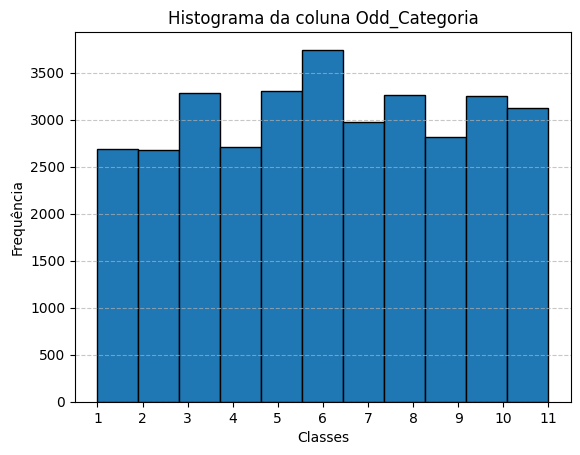

In [ ]:
# Configurar o histograma
plt.hist(data['Odd_Categoria'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna Odd_Categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


In [ ]:

part = []
print(len(data))
for k in range(1, len(data)):
    #print(k, data['hora'][k], type(data['hora'][k]))
    if data['hora'][k] >= 6 and data['hora'][k] <  12:
        part.append(1)
    elif data['hora'][k] >= 12 and data['hora'][k] < 18:
        part.append(2)
    elif 18 <= data['hora'][k] < 24:
        part.append(3)
    else:
        part.append(4)
part1 = np.ones(len(data), dtype = int)
for i in range(0, len(data)):
    if i == 0:
        part1[i] = part[i]
    else:
        part1[i] = part[i - 1]

data['parte_do_dia'] = part1

print(len(part1))
print(part1)

# Atualize a coluna 'hora' após a remoção de linhas
data['hora'] = data['horario'].apply(lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S %Y").hour)

data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
data['odd_mediana5'] = data['Odd_Categoria'].rolling(window=5).median()
data['odd_mediana10'] = data['Odd_Categoria'].rolling(window=10).median()
data['odd_mediana20'] = data['Odd_Categoria'].rolling(window=20).median()
data['odd_mediana40'] = data['Odd_Categoria'].rolling(window=40).median()
data['odd_mediana80'] = data['Odd_Categoria'].rolling(window=80).median()
data['odd_mediana160'] = data['Odd_Categoria'].rolling(window=160).median()
data['odd_mediana320'] = data['Odd_Categoria'].rolling(window=320).median()
data['odd_mediana640'] = data['Odd_Categoria'].rolling(window=640).median()

data['odd_desvio_padrao5'] = data['Odd_Categoria'].rolling(window=5).std()
data['odd_desvio_padrao10'] = data['Odd_Categoria'].rolling(window=10).std()
data['odd_desvio_padrao20'] = data['Odd_Categoria'].rolling(window=20).std()
data['odd_desvio_padrao40'] = data['Odd_Categoria'].rolling(window=40).std()
data['odd_desvio_padrao80'] = data['Odd_Categoria'].rolling(window=80).std()
data['odd_desvio_padrao160'] = data['Odd_Categoria'].rolling(window=160).std()
data['odd_desvio_padrao320'] = data['Odd_Categoria'].rolling(window=320).std()
data['odd_desvio_padrao640'] = data['Odd_Categoria'].rolling(window=640).std()

data['odd_min5'] = data['Odd_Categoria'].rolling(window=5).min()
data['odd_min10'] = data['Odd_Categoria'].rolling(window=10).min()
data['odd_min20'] = data['Odd_Categoria'].rolling(window=20).min()
data['odd_min40'] = data['Odd_Categoria'].rolling(window=40).min()
data['odd_min80'] = data['Odd_Categoria'].rolling(window=80).min()

data['odd_max5'] = data['Odd_Categoria'].rolling(window=5).max()
data['odd_max10'] = data['Odd_Categoria'].rolling(window=10).max()
data['odd_max20'] = data['Odd_Categoria'].rolling(window=20).max()
data['odd_max40'] = data['Odd_Categoria'].rolling(window=40).max()
data['odd_max80'] = data['Odd_Categoria'].rolling(window=80).max()

# Tendência das Odds
data['odd_tendencia'] = data['Odd_Categoria'].diff()

# Tendência de Média Móvel
data['tendencia_media_movel5'] = data['odd_categoria_media_movel5'].diff()
data['tendencia_media_movel10'] = data['odd_categoria_media_movel10'].diff()
data['tendencia_media_movel20'] = data['odd_categoria_media_movel20'].diff()
data['tendencia_media_movel40'] = data['odd_categoria_media_movel40'].diff()
data['tendencia_media_movel80'] = data['odd_categoria_media_movel80'].diff()
data['tendencia_media_movel160'] = data['odd_categoria_media_movel160'].diff()
data['tendencia_media_movel320'] = data['odd_categoria_media_movel320'].diff()
data['tendencia_media_movel640'] = data['odd_categoria_media_movel640'].diff()

# Contagem de repetições das categorias
data['categoria_contagem'] = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

33837
33837
[4 4 4 ... 3 3 3]


<ipython-input-41-8530d15aea43>:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna


Series([], dtype: int64)


<ipython-input-41-8530d15aea43>:87: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


(33837, 52)

In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['parte_do_dia','odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
       'odd_max80', 'odd_tendencia',
       'tendencia_media_movel5', 'tendencia_media_movel10',
       'tendencia_media_movel20', 'tendencia_media_movel40',
       'tendencia_media_movel80', 'tendencia_media_movel160',
       'tendencia_media_movel320', 'tendencia_media_movel640',
       'categoria_contagem']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model.add(LSTM(64))  # Segunda camada LSTM
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model_train = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=30, batch_size=32, validation_split=0.2)
#model_train

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')

Epoch 1/30
677/677 [==============================] - 44s 59ms/step - loss: 0.9977 - accuracy: 0.6278 - val_loss: 0.5156 - val_accuracy: 0.8127
Epoch 2/30
677/677 [==============================] - 35s 51ms/step - loss: 0.4581 - accuracy: 0.8318 - val_loss: 0.3887 - val_accuracy: 0.8572
Epoch 3/30
677/677 [==============================] - 37s 54ms/step - loss: 0.3782 - accuracy: 0.8627 - val_loss: 0.3109 - val_accuracy: 0.8888
Epoch 4/30
677/677 [==============================] - 34s 51ms/step - loss: 0.3155 - accuracy: 0.8884 - val_loss: 0.2902 - val_accuracy: 0.8929
Epoch 5/30
677/677 [==============================] - 36s 54ms/step - loss: 0.2780 - accuracy: 0.9029 - val_loss: 0.2227 - val_accuracy: 0.9239
Epoch 6/30
677/677 [==============================] - 46s 68ms/step - loss: 0.2524 - accuracy: 0.9114 - val_loss: 0.2227 - val_accuracy: 0.9235
Epoch 7/30
677/677 [==============================] - 37s 55ms/step - loss: 0.2349 - accuracy: 0.9175 - val_loss: 0.2025 - val_accuracy:

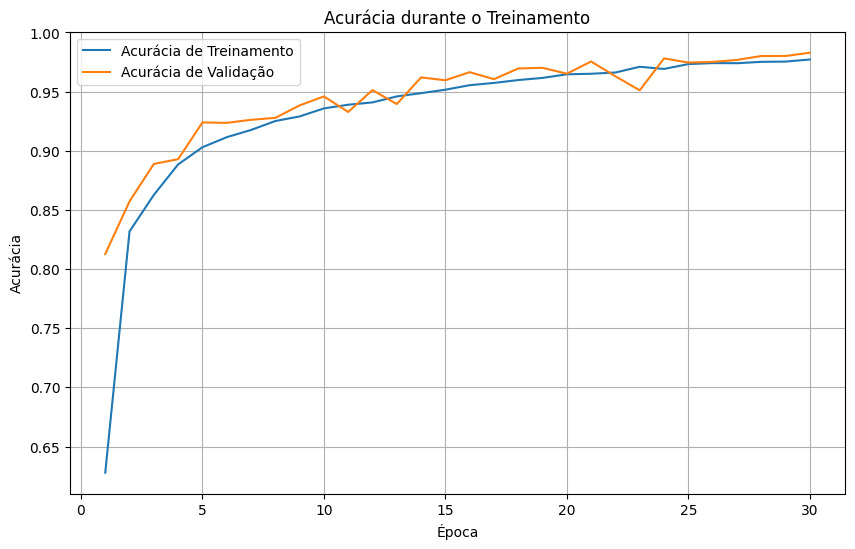

In [ ]:
# Extrair as métricas de treinamento
train_acc = model_train.history['accuracy']
val_acc = model_train.history['val_accuracy']

# Criar um gráfico da acurácia durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_acc, label='Acurácia de Treinamento')
plt.plot(range(1, 31), val_acc, label='Acurácia de Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_predict1 = pd.DataFrame()
data_predict1['teste'] = y_test
data_predict1['predicao'] = predicted_labels
data_predict1

,teste,predicao
0,2,2
1,8,8
2,6,6
3,9,9
4,8,8
...,...,...
6763,7,7
6764,5,5
6765,6,6
6766,10,10


In [ ]:
data1 = data
data = data2

In [ ]:
data3 = data2

In [ ]:
array_categoriat = []
for name in data['tempo_em_segundos']:
  if name < 12:
    array_categoriat.append(1)
  elif name >= 12 and name < 13.5:
    array_categoriat.append(2)
  elif name >= 13.5 and name < 15:
    array_categoriat.append(3)
  elif name >= 15 and name < 16.5:
    array_categoriat.append(4)
  elif name >= 16.5 and name < 19:
    array_categoriat.append(5)
  elif name >= 19 and name < 21:
    array_categoriat.append(6)
  elif name >= 21 and name < 24:
    array_categoriat.append(7)
  elif name >= 24 and name < 27:
    array_categoriat.append(8)
  elif name >= 27 and name < 32:
    array_categoriat.append(9)
  elif name >= 32 and name < 40:
    array_categoriat.append(10)
  elif name >= 40:
    array_categoriat.append(11)

array_categoriat = pd.DataFrame(array_categoriat)
print(len(array_categoriat))
array_categoriat.columns = ['tempo_segundos_categoria']
#array_categoriat.head()
data = pd.concat([data, array_categoriat], axis = 1)

data['tempo_segundos_categoria'].describe()


33837


count    33837.000000
mean         6.147797
std          3.099780
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: tempo_segundos_categoria, dtype: float64

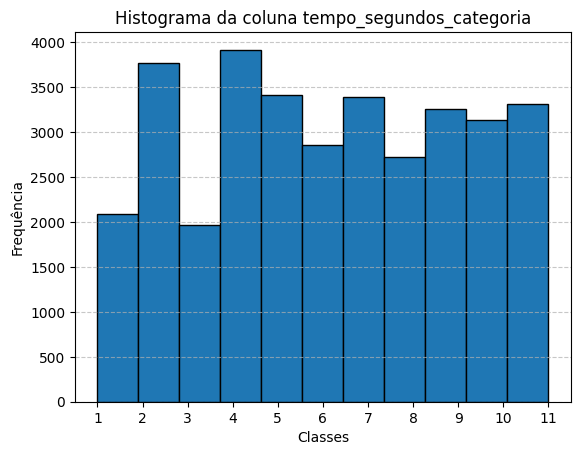

In [ ]:
# Configurar o histograma
plt.hist(data['tempo_segundos_categoria'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna tempo_segundos_categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


In [ ]:
data['media_movel_segundo5c'] = data['tempo_segundos_categoria'].rolling(window=5).mean()
data['media_movel_segundo10c'] = data['tempo_segundos_categoria'].rolling(window=10).mean()
data['media_movel_segundo20c'] = data['tempo_segundos_categoria'].rolling(window=20).mean()
data['media_movel_segundo40c'] = data['tempo_segundos_categoria'].rolling(window=40).mean()
data['media_movel_segundo80c'] = data['tempo_segundos_categoria'].rolling(window=80).mean()
data['media_movel_segundo160c'] = data['tempo_segundos_categoria'].rolling(window=160).mean()
data['media_movel_segundo320c'] = data['tempo_segundos_categoria'].rolling(window=320).mean()
data['media_movel_segundo640c'] = data['tempo_segundos_categoria'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
#tsc - tempo segundos categoria
data['tsc_mediana5'] = data['tempo_segundos_categoria'].rolling(window=5).median()
data['tsc_mediana10'] = data['tempo_segundos_categoria'].rolling(window=10).median()
data['tsc_mediana20'] = data['tempo_segundos_categoria'].rolling(window=20).median()
data['tsc_mediana40'] = data['tempo_segundos_categoria'].rolling(window=40).median()
data['tsc_mediana80'] = data['tempo_segundos_categoria'].rolling(window=80).median()
data['tsc_mediana160'] = data['tempo_segundos_categoria'].rolling(window=160).median()
data['tsc_mediana320'] = data['tempo_segundos_categoria'].rolling(window=320).median()
data['tsc_mediana640'] = data['tempo_segundos_categoria'].rolling(window=640).median()

data['tsc_desvio_padrao5'] = data['tempo_segundos_categoria'].rolling(window=5).std()
data['tsc_desvio_padrao10'] = data['tempo_segundos_categoria'].rolling(window=10).std()
data['tsc_desvio_padrao20'] = data['tempo_segundos_categoria'].rolling(window=20).std()
data['tsc_desvio_padrao40'] = data['tempo_segundos_categoria'].rolling(window=40).std()
data['tsc_desvio_padrao80'] = data['tempo_segundos_categoria'].rolling(window=80).std()
data['tsc_desvio_padrao160'] = data['tempo_segundos_categoria'].rolling(window=160).std()
data['tsc_desvio_padrao320'] = data['tempo_segundos_categoria'].rolling(window=320).std()
data['tsc_desvio_padrao640'] = data['tempo_segundos_categoria'].rolling(window=640).std()

data['tsc_min5'] = data['tempo_segundos_categoria'].rolling(window=5).min()
data['tsc_min10'] = data['tempo_segundos_categoria'].rolling(window=10).min()
data['tsc_min20'] = data['tempo_segundos_categoria'].rolling(window=20).min()
data['tsc_min40'] = data['tempo_segundos_categoria'].rolling(window=40).min()
data['tsc_min80'] = data['tempo_segundos_categoria'].rolling(window=80).min()
data['tsc_min160'] = data['tempo_segundos_categoria'].rolling(window=160).min()
data['tsc_min320'] = data['tempo_segundos_categoria'].rolling(window=320).min()

data['tsc_max5'] = data['tempo_segundos_categoria'].rolling(window=5).max()
data['tsc_max10'] = data['tempo_segundos_categoria'].rolling(window=10).max()
data['tsc_max20'] = data['tempo_segundos_categoria'].rolling(window=20).max()
data['tsc_max40'] = data['tempo_segundos_categoria'].rolling(window=40).max()

# Tendência das Odds
data['tsc_tendencia'] = data['tempo_segundos_categoria'].diff()

# Tendência de Média Móvel
data['tendencia_media_movel_tsc5'] = data['media_movel_segundo5c'].diff()
data['tendencia_media_movel_tsc10'] = data['media_movel_segundo10c'].diff()
data['tendencia_media_movel_tsc20'] = data['media_movel_segundo20c'].diff()
data['tendencia_media_movel_tsc40'] = data['media_movel_segundo40c'].diff()
data['tendencia_media_movel_tsc80'] = data['media_movel_segundo80c'].diff()
data['tendencia_media_movel_tsc160'] = data['media_movel_segundo160c'].diff()
data['tendencia_media_movel_tsc320'] = data['media_movel_segundo320c'].diff()
data['tendencia_media_movel_tsc640'] = data['media_movel_segundo640c'].diff()

# Contagem de repetições das categorias
data['categoria_contagem_tsc'] = data['tempo_segundos_categoria'].map(data['tempo_segundos_categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

<ipython-input-50-d350d307df2e>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna


Series([], dtype: int64)


<ipython-input-50-d350d307df2e>:62: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


(33837, 52)

<ipython-input-51-516b264cc2dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


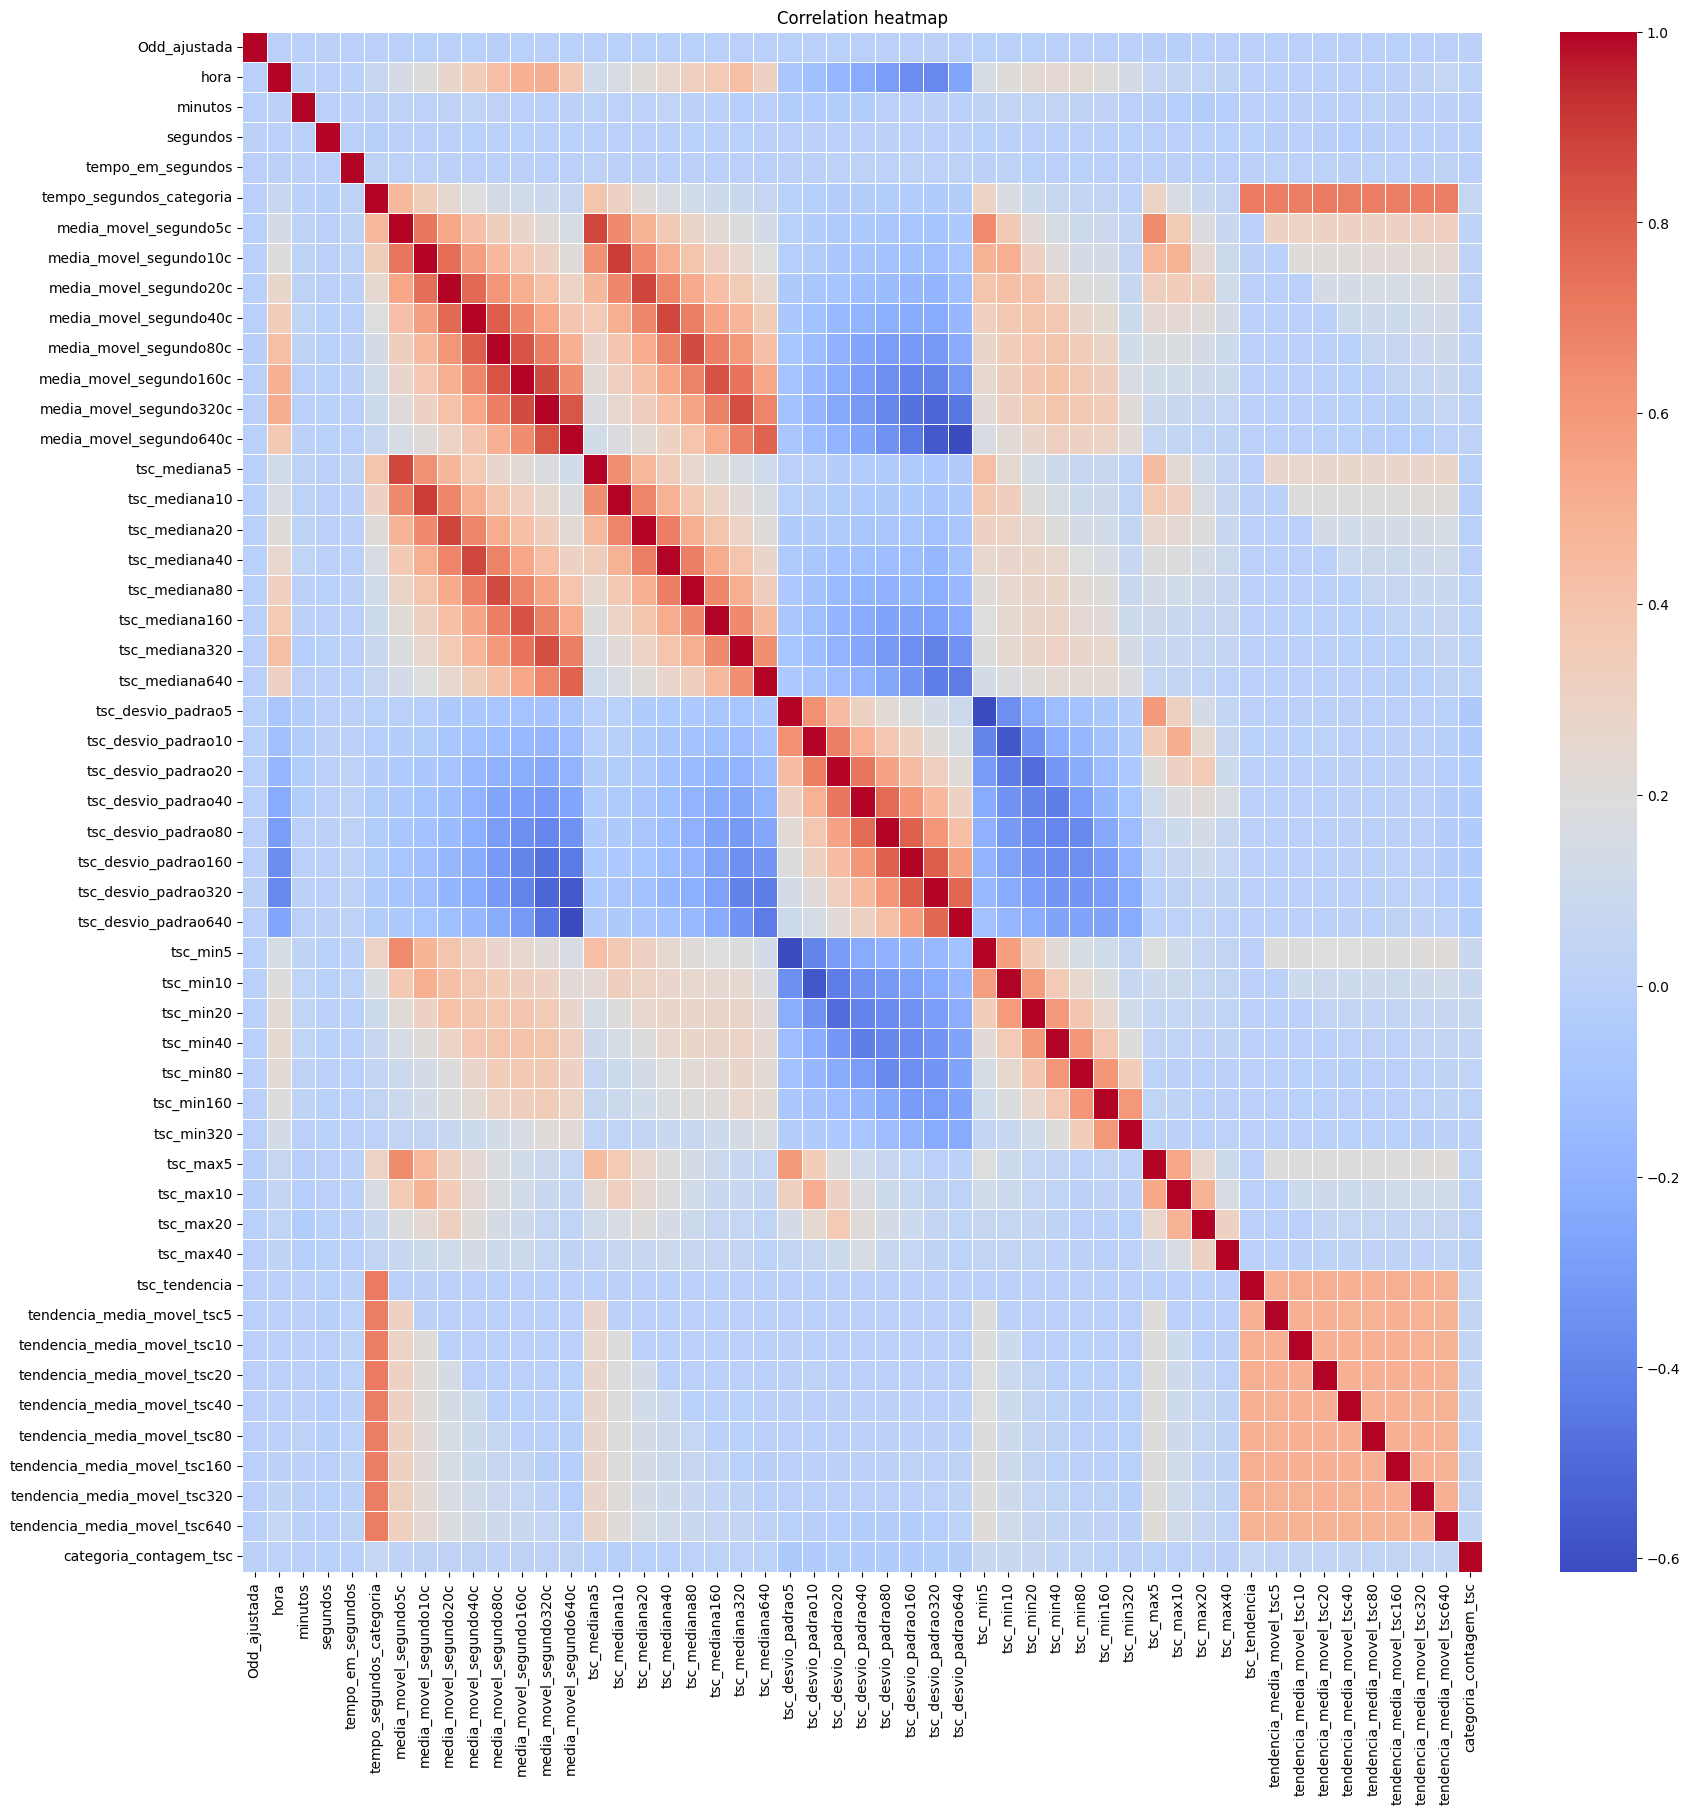

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
# Separar recursos (X) e rótulos (y)
X1 = data[['media_movel_segundo5c', 'media_movel_segundo10c',
       'media_movel_segundo20c', 'media_movel_segundo40c',
       'media_movel_segundo80c', 'media_movel_segundo160c',
       'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
       'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
       'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
       'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
       'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
       'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
       'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320',
       'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
       'tsc_tendencia', 'tendencia_media_movel_tsc5',
       'tendencia_media_movel_tsc10', 'tendencia_media_movel_tsc20',
       'tendencia_media_movel_tsc40', 'tendencia_media_movel_tsc80',
       'tendencia_media_movel_tsc160', 'tendencia_media_movel_tsc320',
       'tendencia_media_movel_tsc640', 'categoria_contagem_tsc']].values
y1 = data['tempo_segundos_categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Dividir os dados em treinamento e teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model1 = Sequential()
model1.add(LSTM(64, input_shape=(X_train1.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model1.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model1.add(LSTM(64))  # Segunda camada LSTM
model1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model1.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model_train1 = model1.fit(X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1), y_train1, epochs=30, batch_size=32, validation_split=0.2)
#model_train

# Avaliar o modelo no conjunto de teste
accuracy1 = model1.evaluate(X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1), y_test1)[1]
print(f'Acurácia do modelo: {accuracy1}')

# Fazer previsões
predictions1 = model1.predict(X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels1 = np.argmax(predictions1, axis=1)

# Calcular o F1-Score
f1_1 = f1_score(y_test1, predicted_labels1, average='weighted')

print(f'F1-Score do modelo: {f1_1}')

Epoch 1/30
677/677 [==============================] - 41s 53ms/step - loss: 1.0925 - accuracy: 0.5916 - val_loss: 0.5961 - val_accuracy: 0.7922
Epoch 2/30
677/677 [==============================] - 38s 57ms/step - loss: 0.4462 - accuracy: 0.8568 - val_loss: 0.3168 - val_accuracy: 0.9067
Epoch 3/30
677/677 [==============================] - 35s 52ms/step - loss: 0.2973 - accuracy: 0.9101 - val_loss: 0.1918 - val_accuracy: 0.9579
Epoch 4/30
677/677 [==============================] - 37s 54ms/step - loss: 0.2254 - accuracy: 0.9355 - val_loss: 0.1769 - val_accuracy: 0.9538
Epoch 5/30
677/677 [==============================] - 40s 59ms/step - loss: 0.1861 - accuracy: 0.9476 - val_loss: 0.1716 - val_accuracy: 0.9481
Epoch 6/30
677/677 [==============================] - 35s 52ms/step - loss: 0.1532 - accuracy: 0.9572 - val_loss: 0.1329 - val_accuracy: 0.9660
Epoch 7/30
677/677 [==============================] - 37s 55ms/step - loss: 0.1414 - accuracy: 0.9594 - val_loss: 0.1043 - val_accuracy:

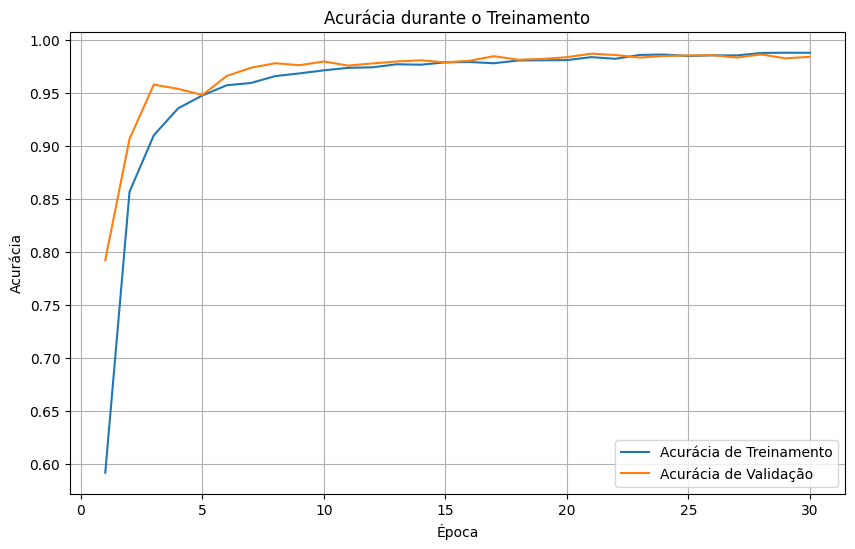

In [ ]:
# Extrair as métricas de treinamento
train_acc1 = model_train1.history['accuracy']
val_acc1 = model_train1.history['val_accuracy']

# Criar um gráfico da acurácia durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_acc1, label='Acurácia de Treinamento')
plt.plot(range(1, 31), val_acc1, label='Acurácia de Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_predict2 = pd.DataFrame()
data_predict2['teste'] = y_test1
data_predict2['predicao'] = predicted_labels1
data_predict2

,teste,predicao
0,2,2
1,6,6
2,4,4
3,7,7
4,4,4
...,...,...
6763,2,2
6764,9,9
6765,10,10
6766,8,8


In [ ]:
data5 = data3
data5

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14
...,...,...,...,...,...,...
33832,14.09,22,0,16,Mon Oct 16 22:00:16 2023,21
33833,1.84,22,0,35,Mon Oct 16 22:00:35 2023,45
33834,1.50,22,0,54,Mon Oct 16 22:00:54 2023,19
33835,4.49,22,1,27,Mon Oct 16 22:01:27 2023,19


In [ ]:
data6 = data3

In [ ]:
mno = 0
while mno <= 149:
  print("Olá chefe, tudo bem ? Estamos em: ", mno + 1)
  data3 = data5
  data4 = data5
  data = data3

  #data.head()
  print(data.shape)

  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")

  array_categoriat = []
  for name in data['tempo_em_segundos']:
    if name < 12:
      array_categoriat.append(1)
    elif name >= 12 and name < 13.5:
      array_categoriat.append(2)
    elif name >= 13.5 and name < 15:
      array_categoriat.append(3)
    elif name >= 15 and name < 16.5:
      array_categoriat.append(4)
    elif name >= 16.5 and name < 19:
      array_categoriat.append(5)
    elif name >= 19 and name < 21:
      array_categoriat.append(6)
    elif name >= 21 and name < 24:
      array_categoriat.append(7)
    elif name >= 24 and name < 27:
      array_categoriat.append(8)
    elif name >= 27 and name < 32:
      array_categoriat.append(9)
    elif name >= 32 and name < 40:
      array_categoriat.append(10)
    elif name >= 40:
      array_categoriat.append(11)

  array_categoriat = pd.DataFrame(array_categoriat)
  print(len(array_categoriat))
  array_categoriat.columns = ['tempo_segundos_categoria']
  #array_categoriat.head()
  data = pd.concat([data, array_categoriat], axis = 1)

  data['tempo_segundos_categoria'].describe()

  data['media_movel_segundo5c'] = data['tempo_em_segundos'].rolling(window=5).mean()
  data['media_movel_segundo10c'] = data['tempo_em_segundos'].rolling(window=10).mean()
  data['media_movel_segundo20c'] = data['tempo_em_segundos'].rolling(window=20).mean()
  data['media_movel_segundo40c'] = data['tempo_em_segundos'].rolling(window=40).mean()
  data['media_movel_segundo80c'] = data['tempo_em_segundos'].rolling(window=80).mean()
  data['media_movel_segundo160c'] = data['tempo_em_segundos'].rolling(window=160).mean()
  data['media_movel_segundo320c'] = data['tempo_em_segundos'].rolling(window=320).mean()
  data['media_movel_segundo640c'] = data['tempo_em_segundos'].rolling(window=640).mean()

    # Repita para as outras colunas de médias móveis
  k1_media_movel_segundo5c = data['tempo_segundos_categoria'].rolling(window=5).mean().iloc[-1]
  k1_media_movel_segundo10c = data['tempo_segundos_categoria'].rolling(window=10).mean().iloc[-1]
  k1_media_movel_segundo20c = data['tempo_segundos_categoria'].rolling(window=20).mean().iloc[-1]
  k1_media_movel_segundo40c = data['tempo_segundos_categoria'].rolling(window=40).mean().iloc[-1]
  k1_media_movel_segundo80c = data['tempo_segundos_categoria'].rolling(window=80).mean().iloc[-1]
  k1_media_movel_segundo160c = data['tempo_segundos_categoria'].rolling(window=160).mean().iloc[-1]
  k1_media_movel_segundo320c = data['tempo_segundos_categoria'].rolling(window=320).mean().iloc[-1]
  k1_media_movel_segundo640c = data['tempo_segundos_categoria'].rolling(window=640).mean().iloc[-1]

  # Estatísticas Descritivas
  #tsc - tempo segundos categoria
  k1_tsc_mediana5 = data['tempo_segundos_categoria'].rolling(window=5).median().iloc[-1]
  k1_tsc_mediana10 = data['tempo_segundos_categoria'].rolling(window=10).median().iloc[-1]
  k1_tsc_mediana20 = data['tempo_segundos_categoria'].rolling(window=20).median().iloc[-1]
  k1_tsc_mediana40 = data['tempo_segundos_categoria'].rolling(window=40).median().iloc[-1]
  k1_tsc_mediana80 = data['tempo_segundos_categoria'].rolling(window=80).median().iloc[-1]
  k1_tsc_mediana160 = data['tempo_segundos_categoria'].rolling(window=160).median().iloc[-1]
  k1_tsc_mediana320 = data['tempo_segundos_categoria'].rolling(window=320).median().iloc[-1]
  k1_tsc_mediana640 = data['tempo_segundos_categoria'].rolling(window=640).median().iloc[-1]

  k1_tsc_desvio_padrao5 = data['tempo_segundos_categoria'].rolling(window=5).std().iloc[-1]
  k1_tsc_desvio_padrao10 = data['tempo_segundos_categoria'].rolling(window=10).std().iloc[-1]
  k1_tsc_desvio_padrao20 = data['tempo_segundos_categoria'].rolling(window=20).std().iloc[-1]
  k1_tsc_desvio_padrao40 = data['tempo_segundos_categoria'].rolling(window=40).std().iloc[-1]
  k1_tsc_desvio_padrao80 = data['tempo_segundos_categoria'].rolling(window=80).std().iloc[-1]
  k1_tsc_desvio_padrao160 = data['tempo_segundos_categoria'].rolling(window=160).std().iloc[-1]
  k1_tsc_desvio_padrao320 = data['tempo_segundos_categoria'].rolling(window=320).std().iloc[-1]
  k1_tsc_desvio_padrao640 = data['tempo_segundos_categoria'].rolling(window=640).std().iloc[-1]

  k1_tsc_min5 = data['tempo_segundos_categoria'].rolling(window=5).min().iloc[-1]
  k1_tsc_min10 = data['tempo_segundos_categoria'].rolling(window=10).min().iloc[-1]
  k1_tsc_min20 = data['tempo_segundos_categoria'].rolling(window=20).min().iloc[-1]
  k1_tsc_min40 = data['tempo_segundos_categoria'].rolling(window=40).min().iloc[-1]
  k1_tsc_min80 = data['tempo_segundos_categoria'].rolling(window=80).min().iloc[-1]
  k1_tsc_min160 = data['tempo_segundos_categoria'].rolling(window=160).min().iloc[-1]
  k1_tsc_min320 = data['tempo_segundos_categoria'].rolling(window=320).min().iloc[-1]

  k1_tsc_max5 = data['tempo_segundos_categoria'].rolling(window=5).max().iloc[-1]
  k1_tsc_max10 = data['tempo_segundos_categoria'].rolling(window=10).max().iloc[-1]
  k1_tsc_max20 = data['tempo_segundos_categoria'].rolling(window=20).max().iloc[-1]
  k1_tsc_max40 = data['tempo_segundos_categoria'].rolling(window=40).max().iloc[-1]

  # Tendência das Odds
  k1_tsc_tendencia = data['tempo_segundos_categoria'].diff().iloc[-1]

  # Tendência de Média Móvel
  k1_tendencia_media_movel_tsc5 = data['media_movel_segundo5c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc10 = data['media_movel_segundo10c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc20 = data['media_movel_segundo20c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc40 = data['media_movel_segundo40c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc80 = data['media_movel_segundo80c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc160 = data['media_movel_segundo160c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc320 = data['media_movel_segundo320c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc640 = data['media_movel_segundo640c'].diff().iloc[-1]

  # Contagem de repetições das categorias
  k1_categoria_contagem_tsc = data['tempo_segundos_categoria'].map(data['tempo_segundos_categoria'].value_counts()).iloc[-1]

  # Crie um dicionário com os valores calculados
  k1_values = {'media_movel_segundo5c': k1_media_movel_segundo5c,
      'media_movel_segundo10c': k1_media_movel_segundo10c,
      'media_movel_segundo20c': k1_media_movel_segundo20c,
      'media_movel_segundo40c': k1_media_movel_segundo40c,
      'media_movel_segundo80c': k1_media_movel_segundo80c,
      'media_movel_segundo160c': k1_media_movel_segundo160c,
      'media_movel_segundo320c': k1_media_movel_segundo320c,
      'media_movel_segundo640c': k1_media_movel_segundo640c,
      'tsc_mediana5': k1_tsc_mediana5,
      'tsc_mediana10': k1_tsc_mediana10,
      'tsc_mediana20': k1_tsc_mediana20,
      'tsc_mediana40': k1_tsc_mediana40,
      'tsc_mediana80': k1_tsc_mediana80,
      'tsc_mediana160': k1_tsc_mediana160,
      'tsc_mediana320': k1_tsc_mediana320,
      'tsc_mediana640': k1_tsc_mediana640,
      'tsc_desvio_padrao5': k1_tsc_desvio_padrao5,
      'tsc_desvio_padrao10': k1_tsc_desvio_padrao10,
      'tsc_desvio_padrao20':k1_tsc_desvio_padrao20,
      'tsc_desvio_padrao40': k1_tsc_desvio_padrao40,
      'tsc_desvio_padrao80':k1_tsc_desvio_padrao80,
      'tsc_desvio_padrao160':k1_tsc_desvio_padrao160,
      'tsc_desvio_padrao320':k1_tsc_desvio_padrao320,
      'tsc_desvio_padrao640':k1_tsc_desvio_padrao640,
      'tsc_min5':k1_tsc_min5,
      'tsc_min10':k1_tsc_min10,
      'tsc_min20':k1_tsc_min20,
      'tsc_min40':k1_tsc_min40,
      'tsc_min80':k1_tsc_min80,
      'tsc_min160':k1_tsc_min40,
      'tsc_min320':k1_tsc_min80,
      'tsc_max5':k1_tsc_max5,
      'tsc_max10':k1_tsc_max10,
      'tsc_max20':k1_tsc_max20,
      'tsc_max40':k1_tsc_max40,
      'tsc_tendencia': k1_tsc_tendencia,
      'tendencia_media_movel_tsc5': k1_tendencia_media_movel_tsc5,
      'tendencia_media_movel_tsc10': k1_tendencia_media_movel_tsc10,
      'tendencia_media_movel_tsc20': k1_tendencia_media_movel_tsc20,
      'tendencia_media_movel_tsc40': k1_tendencia_media_movel_tsc40,
      'tendencia_media_movel_tsc80': k1_tendencia_media_movel_tsc80,
      'tendencia_media_movel_tsc160': k1_tendencia_media_movel_tsc160,
      'tendencia_media_movel_tsc320': k1_tendencia_media_movel_tsc320,
      'tendencia_media_movel_tsc640': k1_tendencia_media_movel_tsc640,
      'categoria_contagem_tsc':k1_categoria_contagem_tsc}

  print(k1_values)
  print(type(k1_values))

  # Especifique um índice (por exemplo, 'k1') para a entrada
  k_entrada = pd.Series(k1_values, name=len(data)+1).to_frame().T

  # Agora 'k1_values' contém a entrada k+1 em formato de DataFrame com índice 'k1'
  print(k_entrada)
  #k_entrada.shape
  #k_entrada.columns
  print(type(k_entrada))

  X4 = k_entrada[['media_movel_segundo5c', 'media_movel_segundo10c',
        'media_movel_segundo20c', 'media_movel_segundo40c',
        'media_movel_segundo80c', 'media_movel_segundo160c',
        'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
        'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
        'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
        'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
        'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
        'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
        'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320', 'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
        'tsc_tendencia', 'tendencia_media_movel_tsc5',
        'tendencia_media_movel_tsc10', 'tendencia_media_movel_tsc20',
        'tendencia_media_movel_tsc40', 'tendencia_media_movel_tsc80',
        'tendencia_media_movel_tsc160', 'tendencia_media_movel_tsc320',
        'tendencia_media_movel_tsc640', 'categoria_contagem_tsc']].values

  X4 = scaler1.transform(X4)

  # Fazer previsões
  predictions4 = model1.predict(X4.reshape(X4.shape[0], X4.shape[1], 1))

  # Arredondar as previsões para obter rótulos de classe
  predicted_labels4 = np.argmax(predictions4, axis=1)

  # Adicionar as previsões ao DataFrame
  k_entrada['tempo_segundos_categoria'] = predicted_labels4

  k_entrada['tempo_segundos_categoria']
  #k_entrada.shape
  print(type(k_entrada['tempo_segundos_categoria']))

  if int(k_entrada['tempo_segundos_categoria']) == 1:
    meand = 8
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 2:
    meand = (12 + 13.5) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 3:
    meand = (13.5 + 15) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 4:
    meand = (15 + 16.5) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 5:
    meand = (16.5 + 19) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 6:
    meand = (19 + 21) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 7:
    meand = (21 + 24) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 8:
    meand = (24 + 27) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 9:
    meand = (27 + 32) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 10:
    meand = (32 + 40) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  else:
    k_entrada['tempo_em_segundos'] = 60


  k_entrada.shape
  print(k_entrada['tempo_em_segundos'])

  # Obtenha o último valor da coluna 'horario' em 'data'
  ultimo_horario = pd.to_datetime(data['horario'].iloc[-1])

  # Obtenha a quantidade de segundos de 'k_entrada'
  segundos_a_adicionar = k_entrada['tempo_em_segundos'].item()

  # Converta a quantidade de segundos em um objeto timedelta
  delta_tempo = timedelta(seconds=segundos_a_adicionar)

  # Adicione o timedelta ao último horário
  novo_horario = ultimo_horario + delta_tempo

  # Resultado
  print(novo_horario)
  k_entrada['horario'] = novo_horario

  k_entrada['hora'] = novo_horario.hour
  k_entrada['minutos'] = novo_horario.minute
  k_entrada['segundos'] = novo_horario.second

  if int(k_entrada['hora']) >= 6 and int(k_entrada['hora']) <  12:
    k_entrada['parte_do_dia'] = 1
  elif int(k_entrada['hora']) >= 12 and int(k_entrada['hora']) < 18:
    k_entrada['parte_do_dia'] = 2
  elif 18 <= int(k_entrada['hora']) < 24:
    k_entrada['parte_do_dia'] = 3
  else:
    k_entrada['parte_do_dia'] = 4
  print(k_entrada['parte_do_dia'])

#  data5 = data4
  data = data5
  print(data.shape)

  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'.")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'.")

  geral_cat = []
  for name in data['Odd_ajustada']:
    #print(name)
    if name < 1.05:
      geral_cat.append(1)
    elif name >= 1.05 and name < 1.15:
      geral_cat.append(2)
    elif name >= 1.15 and name < 1.3:
      geral_cat.append(3)
    elif name >= 1.3 and name < 1.45:
      geral_cat.append(4)
    elif name >= 1.45 and name < 1.7:
      geral_cat.append(5)
    elif name >= 1.7 and name < 2.1:
      geral_cat.append(6)
    elif name >= 2.1 and name < 2.6:
      geral_cat.append(7)
    elif name >= 2.6 and name < 3.5:
      geral_cat.append(8)
    elif name >= 3.5 and name < 5:
      geral_cat.append(9)
    elif name >= 5 and name < 10:
      geral_cat.append(10)
    elif name >= 10:
      geral_cat.append(11)
  print(len(geral_cat))
  geral_cat1 = pd.DataFrame([geral_cat]).T
  geral_cat1.columns = ['Odd_Categoria']
  data = pd.concat([data, geral_cat1], axis = 1)

  data['Odd_Categoria'].describe()
  part = []
  print(len(data))
  for k in range(1, len(data)):
      #print(k, data['hora'][k], type(data['hora'][k]))
      if data['hora'][k] >= 6 and data['hora'][k] <  12:
          part.append(1)
      elif data['hora'][k] >= 12 and data['hora'][k] < 18:
          part.append(2)
      elif 18 <= data['hora'][k] < 24:
          part.append(3)
      else:
          part.append(4)
  part1 = np.ones(len(data), dtype = int)
  for i in range(0, len(data)):
      if i == 0:
          part1[i] = part[i]
      else:
          part1[i] = part[i - 1]

  data['parte_do_dia'] = part1

  print(len(part1))
  print(part1)

  # Calcule o terceiro quartil (75%)
  third_quartile = data['tempo_em_segundos'].quantile(0.75)

  # Filtre os dados para manter apenas os valores abaixo do terceiro quartil
  data = data[data['tempo_em_segundos'] <= 300]

  # Atualize a coluna 'hora' após a remoção de linhas
  data['hora'] = data['horario'].apply(lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S %Y").hour)

  # Verifique novamente a descrição estatística após a remoção
  print(data['tempo_em_segundos'].describe())

  data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
  data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
  data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
  data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
  data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
  data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
  data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
  data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()

  k2_entradat = k_entrada['tempo_em_segundos'].iloc[-1]
  k2_entradap = k_entrada['parte_do_dia'].iloc[-1]
  print(k2_entradat, k2_entradap)
  k2_media_movel_segundo5 = data['tempo_em_segundos'].rolling(window=5).mean().iloc[-1]
  k2_media_movel_segundo10 = data['tempo_em_segundos'].rolling(window=10).mean().iloc[-1]
  k2_media_movel_segundo20 = data['tempo_em_segundos'].rolling(window=20).mean().iloc[-1]
  k2_media_movel_segundo40 = data['tempo_em_segundos'].rolling(window=40).mean().iloc[-1]
  k2_media_movel_segundo80 = data['tempo_em_segundos'].rolling(window=80).mean().iloc[-1]
  k2_media_movel_segundo160 = data['tempo_em_segundos'].rolling(window=160).mean().iloc[-1]
  k2_media_movel_segundo320 = data['tempo_em_segundos'].rolling(window=320).mean().iloc[-1]
  k2_media_movel_segundo640 = data['tempo_em_segundos'].rolling(window=640).mean().iloc[-1]

  k2_odd_categoria_media_movel5 = data['Odd_Categoria'].rolling(window=5).mean().iloc[-1]
  k2_odd_categoria_media_movel10 = data['Odd_Categoria'].rolling(window=10).mean().iloc[-1]
  k2_odd_categoria_media_movel20 = data['Odd_Categoria'].rolling(window=20).mean().iloc[-1]
  k2_odd_categoria_media_movel40 = data['Odd_Categoria'].rolling(window=40).mean().iloc[-1]
  k2_odd_categoria_media_movel80 = data['Odd_Categoria'].rolling(window=80).mean().iloc[-1]
  k2_odd_categoria_media_movel160 = data['Odd_Categoria'].rolling(window=160).mean().iloc[-1]
  k2_odd_categoria_media_movel320 = data['Odd_Categoria'].rolling(window=320).mean().iloc[-1]
  k2_odd_categoria_media_movel640 = data['Odd_Categoria'].rolling(window=640).mean().iloc[-1]

  #data = data.fillna(data.mean())  # Preencher com a média da coluna

  # Estatísticas Descritivas
  k2_odd_mediana5 = data['Odd_Categoria'].rolling(window=5).median().iloc[-1]
  k2_odd_mediana10 = data['Odd_Categoria'].rolling(window=10).median().iloc[-1]
  k2_odd_mediana20 = data['Odd_Categoria'].rolling(window=20).median().iloc[-1]
  k2_odd_mediana40 = data['Odd_Categoria'].rolling(window=40).median().iloc[-1]
  k2_odd_mediana80 = data['Odd_Categoria'].rolling(window=80).median().iloc[-1]
  k2_odd_mediana160 = data['Odd_Categoria'].rolling(window=160).median().iloc[-1]
  k2_odd_mediana320 = data['Odd_Categoria'].rolling(window=320).median().iloc[-1]
  k2_odd_mediana640 = data['Odd_Categoria'].rolling(window=640).median().iloc[-1]

  k2_odd_desvio_padrao5 = data['Odd_Categoria'].rolling(window=5).std().iloc[-1]
  k2_odd_desvio_padrao10 = data['Odd_Categoria'].rolling(window=10).std().iloc[-1]
  k2_odd_desvio_padrao20 = data['Odd_Categoria'].rolling(window=20).std().iloc[-1]
  k2_odd_desvio_padrao40 = data['Odd_Categoria'].rolling(window=40).std().iloc[-1]
  k2_odd_desvio_padrao80 = data['Odd_Categoria'].rolling(window=80).std().iloc[-1]
  k2_odd_desvio_padrao160 = data['Odd_Categoria'].rolling(window=160).std().iloc[-1]
  k2_odd_desvio_padrao320 = data['Odd_Categoria'].rolling(window=320).std().iloc[-1]
  k2_odd_desvio_padrao640 = data['Odd_Categoria'].rolling(window=640).std().iloc[-1]

  k2_odd_min5 = data['Odd_Categoria'].rolling(window=5).min().iloc[-1]
  k2_odd_min10 = data['Odd_Categoria'].rolling(window=10).min().iloc[-1]
  k2_odd_min20 = data['Odd_Categoria'].rolling(window=20).min().iloc[-1]
  k2_odd_min40 = data['Odd_Categoria'].rolling(window=40).min().iloc[-1]
  k2_odd_min80 = data['Odd_Categoria'].rolling(window=80).min().iloc[-1]

  k2_odd_max5 = data['Odd_Categoria'].rolling(window=5).max().iloc[-1]
  k2_odd_max10 = data['Odd_Categoria'].rolling(window=10).max().iloc[-1]
  k2_odd_max20 = data['Odd_Categoria'].rolling(window=20).max().iloc[-1]
  k2_odd_max40 = data['Odd_Categoria'].rolling(window=40).max().iloc[-1]
  k2_odd_max80 = data['Odd_Categoria'].rolling(window=80).max().iloc[-1]

  # Tendência das Odds
  k2_odd_tendencia = data['Odd_Categoria'].diff().iloc[-1]

  # Tendência de Média Móvel
  k2_tendencia_media_movel5 = data['odd_categoria_media_movel5'].diff().iloc[-1]
  k2_tendencia_media_movel10 = data['odd_categoria_media_movel10'].diff().iloc[-1]
  k2_tendencia_media_movel20 = data['odd_categoria_media_movel20'].diff().iloc[-1]
  k2_tendencia_media_movel40 = data['odd_categoria_media_movel40'].diff().iloc[-1]
  k2_tendencia_media_movel80 = data['odd_categoria_media_movel80'].diff().iloc[-1]
  k2_tendencia_media_movel160 = data['odd_categoria_media_movel160'].diff().iloc[-1]
  k2_tendencia_media_movel320 = data['odd_categoria_media_movel320'].diff().iloc[-1]
  k2_tendencia_media_movel640 = data['odd_categoria_media_movel640'].diff().iloc[-1]

  # Contagem de repetições das categorias
  k2_categoria_contagem = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

  k2_values = {'odd_categoria_media_movel5': k2_odd_categoria_media_movel5, 'odd_categoria_media_movel10': k2_odd_categoria_media_movel10,
        'odd_categoria_media_movel20': k2_odd_categoria_media_movel20, 'odd_categoria_media_movel40': k2_odd_categoria_media_movel40,
        'odd_categoria_media_movel80': k2_odd_categoria_media_movel80, 'odd_categoria_media_movel160': k2_odd_categoria_media_movel160,
        'odd_categoria_media_movel320': k2_odd_categoria_media_movel320, 'odd_categoria_media_movel640': k2_odd_categoria_media_movel640,
        'odd_mediana5': k2_odd_mediana5, 'odd_mediana10': k2_odd_mediana10, 'odd_mediana20': k2_odd_mediana20, 'odd_mediana40': k2_odd_mediana40,
        'odd_mediana80': k2_odd_mediana80, 'odd_mediana160': k2_odd_mediana160, 'odd_mediana320': k2_odd_mediana320, 'odd_mediana640': k2_odd_mediana640,
        'odd_desvio_padrao5': k2_odd_desvio_padrao5, 'odd_desvio_padrao10': k2_odd_desvio_padrao10, 'odd_desvio_padrao20': k2_odd_desvio_padrao20,
        'odd_desvio_padrao40': k2_odd_desvio_padrao10, 'odd_desvio_padrao80': k2_odd_desvio_padrao80, 'odd_desvio_padrao160': k2_odd_desvio_padrao160,
        'odd_desvio_padrao320': k2_odd_desvio_padrao320, 'odd_desvio_padrao640': k2_odd_desvio_padrao640, 'odd_min5': k2_odd_min5, 'odd_min10': k2_odd_min5,
        'odd_min20': k2_odd_min5, 'odd_min40': k2_odd_min40, 'odd_min80': k2_odd_min80, 'odd_max5': k2_odd_max5, 'odd_max10': k2_odd_max10, 'odd_max20': k2_odd_max20, 'odd_max40': k2_odd_max40,
        'odd_max80': k2_odd_max80, 'odd_tendencia': k2_odd_tendencia,
        'tendencia_media_movel5': k2_tendencia_media_movel5, 'tendencia_media_movel10': k2_tendencia_media_movel10,
        'tendencia_media_movel20': k2_tendencia_media_movel20, 'tendencia_media_movel40': k2_tendencia_media_movel40,
        'tendencia_media_movel80': k2_tendencia_media_movel80, 'tendencia_media_movel160': k2_tendencia_media_movel160,
        'tendencia_media_movel320': k2_tendencia_media_movel320, 'tendencia_media_movel640': k2_tendencia_media_movel640,
        'categoria_contagem': k2_categoria_contagem, 'parte_do_dia': k2_entradap, 'tempo_em_segundos': k2_entradat}

  # Especifique um índice (por exemplo, 'k1') para a entrada
  k2_entrada = pd.Series(k2_values, name=len(data)+1).to_frame().T

  # Agora 'k1_values' contém a entrada k+1 em formato de DataFrame com índice 'k1'
  print(k2_entrada)
  #k2_entrada.shape
  #k2_entrada.columns
  print(type(k2_entrada))
  # Remova linhas com valores ausentes resultantes das operações de janelas
  #k2_entrada = data.fillna(data.mean())

  # Verifique se há valores nulos em cada coluna
  valores_ausentes = k2_entrada.isna().sum()

  # Exiba as colunas com valores nulos e suas contagens
  print(valores_ausentes[valores_ausentes > 0])

  X6 = k2_entrada[['parte_do_dia',
        'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
        'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
        'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
        'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
        'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
        'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
        'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
        'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
        'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
        'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
        'odd_max80', 'odd_tendencia',
        'tendencia_media_movel5', 'tendencia_media_movel10',
        'tendencia_media_movel20', 'tendencia_media_movel40',
        'tendencia_media_movel80', 'tendencia_media_movel160',
        'tendencia_media_movel320', 'tendencia_media_movel640',
        'categoria_contagem']].values
        # Separar recursos (X) e rótulos (y)

  X6 = scaler.transform(X6)

  # Fazer previsões
  predictions6 = model.predict(X6.reshape(X6.shape[0], X6.shape[1], 1))

  # Arredondar as previsões para obter rótulos de classe
  predicted_labels6 = np.argmax(predictions6, axis=1)

  # Adicionar as previsões ao DataFrame
  k2_entrada['Odd_Categoria'] = predicted_labels6
  #k2_entrada['Odd_Categoria']
  #k2_entrada.shape
  print(k2_entrada['Odd_Categoria'])

  if int(k2_entrada['Odd_Categoria']) == 1:
    k2_entrada['Odd_Ajustada'] = 1.00
  elif int(k2_entrada['Odd_Categoria']) == 2:
    name = (1.05 +  1.15) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 3:
    name = (1.15 +  1.3) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 4:
    name = (1.3 +  1.45) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 5:
    name = (1.45 +  1.7) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 6:
    name = (1.7 + 2.1) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 7:
    name = (2.1 +  2.6) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 8:
    name = (2.6 +  3.5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 9:
    name = (3.5 + 5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 10:
    name = (5 +  10) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 11:
    name = 10
    k2_entrada['Odd_Ajustada'] = name

  datareset1 = k2_entrada['Odd_Ajustada'].iloc[-1]
  datareset2 = k_entrada['horario'].iloc[-1]

  datareset3 = datareset2.hour
  datareset4 = datareset2.minute
  datareset5 = datareset2.second

  # Subtrair as duas datas
  diferenca = pd.to_datetime(data['horario'].iloc[-1]) - pd.to_datetime(data['horario'].iloc[-2])

  # Obter a diferença em segundos
  datareset6 = diferenca.total_seconds()

  # Agora 'segundos_de_diferenca' contém a diferença entre as duas datas em segundos
  print(datareset6)

  datareset2 = pd.to_datetime(datareset2).strftime('%a %b %d %H:%M:%S %Y')

  kn_entrada = {'Odd_ajustada': datareset1, 'hora': datareset3, 'minutos': datareset4, 'segundos': datareset5, 'horario': datareset2, 'tempo_em_segundos': datareset6}
  print(kn_entrada)
  data5 = data5.append(kn_entrada, ignore_index=True)
  mno += 1

Olá chefe, tudo bem ? Estamos em:  1
(33837, 6)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
33837
{'media_movel_segundo5c': 8.0, 'media_movel_segundo10c': 7.5, 'media_movel_segundo20c': 7.8, 'media_movel_segundo40c': 7.5, 'media_movel_segundo80c': 7.725, 'media_movel_segundo160c': 7.3125, 'media_movel_segundo320c': 7.153125, 'media_movel_segundo640c': 6.5859375, 'tsc_mediana5': 7.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 9.0, 'tsc_mediana40': 8.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.3452078799117495, 'tsc_desvio_padrao10': 2.635231383473621, 'tsc_desvio_padrao20': 2.802254731273943, 'tsc_desvio_padrao40': 2.640901167094143, 'tsc_desvio_padrao80': 2.359870195958206, 'tsc_desvio_padrao160': 2.65213216703965, 'tsc_desvio_padrao320': 2.7092647703041877, 'tsc_desvio_padrao640': 2.986477986342921, 'tsc_min5': 6.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 8.4, 'media_movel_segundo10c': 7.5, 'media_movel_segundo20c': 7.8, 'media_movel_segundo40c': 7.45, 'media_movel_segundo80c': 7.7, 'media_movel_segundo160c': 7.325, 'media_movel_segundo320c': 7.175, 'media_movel_segundo640c': 6.5953125, 'tsc_mediana5': 9.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 9.0, 'tsc_mediana40': 8.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.3021728866442976, 'tsc_desvio_padrao10': 2.635231383473621, 'tsc_desvio_padrao20': 2.802254731273943, 'tsc_desvio_padrao40': 2.5914059148240063, 'tsc_desvio_padrao80': 2.335201181260771, 'tsc_desvio_padrao160': 2.6553612553146704, 'tsc_desvio_padrao320': 2.6957530746525267, 'tsc_desvio_padrao640': 2.9846204471615976, 'tsc_min5': 6.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 11.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 8.2, 'media_movel_segundo10c': 7.9, 'media_movel_segundo20c': 7.85, 'media_movel_segundo40c': 7.55, 'media_movel_segundo80c': 7.7625, 'media_movel_segundo160c': 7.36875, 'media_movel_segundo320c': 7.19375, 'media_movel_segundo640c': 6.596875, 'tsc_mediana5': 9.0, 'tsc_mediana10': 8.0, 'tsc_mediana20': 9.0, 'tsc_mediana40': 8.5, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.0493901531919563, 'tsc_desvio_padrao10': 2.6853512081496804, 'tsc_desvio_padrao20': 2.8335397241649667, 'tsc_desvio_padrao40': 2.611120203657609, 'tsc_desvio_padrao80': 2.328925160897824, 'tsc_desvio_padrao160': 2.641282981083891, 'tsc_desvio_padrao320': 2.6944663484299514, 'tsc_desvio_padrao640': 2.986142682804323, 'tsc_min5': 6.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tend

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 8.4, 'media_movel_segundo10c': 7.5, 'media_movel_segundo20c': 7.7, 'media_movel_segundo40c': 7.625, 'media_movel_segundo80c': 7.7375, 'media_movel_segundo160c': 7.35, 'media_movel_segundo320c': 7.2, 'media_movel_segundo640c': 6.6046875, 'tsc_mediana5': 9.0, 'tsc_mediana10': 7.0, 'tsc_mediana20': 8.0, 'tsc_mediana40': 8.5, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.8165902124585327, 'tsc_desvio_padrao10': 2.4608038433722026, 'tsc_desvio_padrao20': 2.79284800875376, 'tsc_desvio_padrao40': 2.548881101933771, 'tsc_desvio_padrao80': 2.326205961907685, 'tsc_desvio_padrao160': 2.6331223544175115, 'tsc_desvio_padrao320': 2.6916799709160895, 'tsc_desvio_padrao640': 2.980632826459166, 'tsc_min5': 6.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 9.2, 'media_movel_segundo10c': 7.9, 'media_movel_segundo20c': 8.15, 'media_movel_segundo40c': 7.7, 'media_movel_segundo80c': 7.7375, 'media_movel_segundo160c': 7.35625, 'media_movel_segundo320c': 7.203125, 'media_movel_segundo640c': 6.6078125, 'tsc_mediana5': 10.0, 'tsc_mediana10': 8.0, 'tsc_mediana20': 9.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.3038404810405626, 'tsc_desvio_padrao10': 2.514402955419449, 'tsc_desvio_padrao20': 2.3457688673326604, 'tsc_desvio_padrao40': 2.5740320560632637, 'tsc_desvio_padrao80': 2.326205961907685, 'tsc_desvio_padrao160': 2.638245259697125, 'tsc_desvio_padrao320': 2.694355457672302, 'tsc_desvio_padrao640': 2.9831453864526427, 'tsc_min5': 7.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_te

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 8.0, 'media_movel_segundo10c': 8.0, 'media_movel_segundo20c': 7.9, 'media_movel_segundo40c': 7.625, 'media_movel_segundo80c': 7.6875, 'media_movel_segundo160c': 7.33125, 'media_movel_segundo320c': 7.18125, 'media_movel_segundo640c': 6.6109375, 'tsc_mediana5': 9.0, 'tsc_mediana10': 8.0, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.549509756796424, 'tsc_desvio_padrao10': 2.3094010767584674, 'tsc_desvio_padrao20': 2.511028306868434, 'tsc_desvio_padrao40': 2.6378652985574482, 'tsc_desvio_padrao80': 2.3631868099525803, 'tsc_desvio_padrao160': 2.6510277465932788, 'tsc_desvio_padrao320': 2.691847380471139, 'tsc_desvio_padrao640': 2.9793560545863045, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_te

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 8.2, 'media_movel_segundo10c': 8.3, 'media_movel_segundo20c': 7.85, 'media_movel_segundo40c': 7.65, 'media_movel_segundo80c': 7.7, 'media_movel_segundo160c': 7.35, 'media_movel_segundo320c': 7.1875, 'media_movel_segundo640c': 6.615625, 'tsc_mediana5': 10.0, 'tsc_mediana10': 9.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.6832815729997757, 'tsc_desvio_padrao10': 2.359378449224815, 'tsc_desvio_padrao20': 2.4553914898485893, 'tsc_desvio_padrao40': 2.6559077833852585, 'tsc_desvio_padrao80': 2.372842124296329, 'tsc_desvio_padrao160': 2.6592664614903554, 'tsc_desvio_padrao320': 2.6960728434946977, 'tsc_desvio_padrao640': 2.982327642800864, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.0, 'media_movel_segundo10c': 7.6, 'media_movel_segundo20c': 7.7, 'media_movel_segundo40c': 7.675, 'media_movel_segundo80c': 7.625, 'media_movel_segundo160c': 7.3625, 'media_movel_segundo320c': 7.18125, 'media_movel_segundo640c': 6.60625, 'tsc_mediana5': 7.0, 'tsc_mediana10': 8.0, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 3.0000000000000373, 'tsc_desvio_padrao10': 2.503331114069114, 'tsc_desvio_padrao20': 2.597569714377744, 'tsc_desvio_padrao40': 2.6154128957747496, 'tsc_desvio_padrao80': 2.3939533533942416, 'tsc_desvio_padrao160': 2.6385804740880805, 'tsc_desvio_padrao320': 2.7011477300512916, 'tsc_desvio_padrao640': 2.981102452279355, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tenden

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.6, 'media_movel_segundo10c': 8.0, 'media_movel_segundo20c': 7.75, 'media_movel_segundo40c': 7.775, 'media_movel_segundo80c': 7.625, 'media_movel_segundo160c': 7.3625, 'media_movel_segundo320c': 7.18125, 'media_movel_segundo640c': 6.6109375, 'tsc_mediana5': 10.0, 'tsc_mediana10': 9.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 3.2863353450310253, 'tsc_desvio_padrao10': 2.538591035287937, 'tsc_desvio_padrao20': 2.6332889181241823, 'tsc_desvio_padrao40': 2.6261749507211287, 'tsc_desvio_padrao80': 2.3939533533942416, 'tsc_desvio_padrao160': 2.6385804740880805, 'tsc_desvio_padrao320': 2.7011477300512916, 'tsc_desvio_padrao640': 2.984079676229269, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_t

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.4, 'media_movel_segundo10c': 7.8, 'media_movel_segundo20c': 7.7, 'media_movel_segundo40c': 7.675, 'media_movel_segundo80c': 7.55, 'media_movel_segundo160c': 7.34375, 'media_movel_segundo320c': 7.1625, 'media_movel_segundo640c': 6.615625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 9.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 7.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 3.2863353450310364, 'tsc_desvio_padrao10': 2.780887148615199, 'tsc_desvio_padrao20': 2.6969768650335433, 'tsc_desvio_padrao40': 2.6927014364094046, 'tsc_desvio_padrao80': 2.4125200858348643, 'tsc_desvio_padrao160': 2.6517986657214196, 'tsc_desvio_padrao320': 2.7023442742927157, 'tsc_desvio_padrao640': 2.977601241759824, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tende

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.6, 'media_movel_segundo10c': 7.8, 'media_movel_segundo20c': 7.65, 'media_movel_segundo40c': 7.7, 'media_movel_segundo80c': 7.5875, 'media_movel_segundo160c': 7.3625, 'media_movel_segundo320c': 7.159375, 'media_movel_segundo640c': 6.628125, 'tsc_mediana5': 10.0, 'tsc_mediana10': 9.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 3.2863353450310253, 'tsc_desvio_padrao10': 2.780887148615199, 'tsc_desvio_padrao20': 2.6412716235695135, 'tsc_desvio_padrao40': 2.709905855115633, 'tsc_desvio_padrao80': 2.4271343210992504, 'tsc_desvio_padrao160': 2.6599463275428494, 'tsc_desvio_padrao320': 2.6984680868363253, 'tsc_desvio_padrao640': 2.9749853696987865, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_te

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.4, 'media_movel_segundo10c': 7.3, 'media_movel_segundo20c': 7.4, 'media_movel_segundo40c': 7.525, 'media_movel_segundo80c': 7.5625, 'media_movel_segundo160c': 7.3625, 'media_movel_segundo320c': 7.14375, 'media_movel_segundo640c': 6.6265625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 8.5, 'tsc_mediana20': 7.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 3.2863353450310364, 'tsc_desvio_padrao10': 2.9832867780352346, 'tsc_desvio_padrao20': 2.7414940221864597, 'tsc_desvio_padrao40': 2.7173469338629905, 'tsc_desvio_padrao80': 2.453846115691318, 'tsc_desvio_padrao160': 2.6599463275428494, 'tsc_desvio_padrao320': 2.7022500203374795, 'tsc_desvio_padrao640': 2.976104215718424, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_te

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.4, 'media_movel_segundo10c': 7.2, 'media_movel_segundo20c': 7.55, 'media_movel_segundo40c': 7.5, 'media_movel_segundo80c': 7.625, 'media_movel_segundo160c': 7.35625, 'media_movel_segundo320c': 7.165625, 'media_movel_segundo640c': 6.6265625, 'tsc_mediana5': 9.0, 'tsc_mediana10': 8.0, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 3.1304951684997375, 'tsc_desvio_padrao10': 2.8982753492378626, 'tsc_desvio_padrao20': 2.742933504576109, 'tsc_desvio_padrao40': 2.6985276137278116, 'tsc_desvio_padrao80': 2.4254713753010466, 'tsc_desvio_padrao160': 2.6548801036543552, 'tsc_desvio_padrao320': 2.68877958529652, 'tsc_desvio_padrao640': 2.976104215718424, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tend

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.2, 'media_movel_segundo10c': 6.9, 'media_movel_segundo20c': 7.2, 'media_movel_segundo40c': 7.525, 'media_movel_segundo80c': 7.55, 'media_movel_segundo160c': 7.3625, 'media_movel_segundo320c': 7.165625, 'media_movel_segundo640c': 6.6265625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 7.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 3.0331501776206653, 'tsc_desvio_padrao10': 3.0713731999438285, 'tsc_desvio_padrao20': 2.7260922485067027, 'tsc_desvio_padrao40': 2.6601282020388206, 'tsc_desvio_padrao80': 2.443798661660546, 'tsc_desvio_padrao160': 2.6457215967095786, 'tsc_desvio_padrao320': 2.68877958529652, 'tsc_desvio_padrao640': 2.976104215718424, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tende

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.2, 'media_movel_segundo10c': 6.8, 'media_movel_segundo20c': 7.35, 'media_movel_segundo40c': 7.625, 'media_movel_segundo80c': 7.55, 'media_movel_segundo160c': 7.38125, 'media_movel_segundo320c': 7.16875, 'media_movel_segundo640c': 6.6265625, 'tsc_mediana5': 9.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.9495762407505612, 'tsc_desvio_padrao10': 2.973961069759372, 'tsc_desvio_padrao20': 2.739093203771507, 'tsc_desvio_padrao40': 2.6378652985574482, 'tsc_desvio_padrao80': 2.443798661660546, 'tsc_desvio_padrao160': 2.6466351605304155, 'tsc_desvio_padrao320': 2.6903330369175293, 'tsc_desvio_padrao640': 2.976104215718424, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 10.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tend

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.0, 'media_movel_segundo10c': 6.8, 'media_movel_segundo20c': 7.4, 'media_movel_segundo40c': 7.5, 'media_movel_segundo80c': 7.5125, 'media_movel_segundo160c': 7.3625, 'media_movel_segundo320c': 7.15, 'media_movel_segundo640c': 6.63125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258826, 'tsc_desvio_padrao10': 2.973961069759372, 'tsc_desvio_padrao20': 2.6635947218195835, 'tsc_desvio_padrao40': 2.6890089681459726, 'tsc_desvio_padrao80': 2.475161419106361, 'tsc_desvio_padrao160': 2.659946327542849, 'tsc_desvio_padrao320': 2.691447035952136, 'tsc_desvio_padrao640': 2.9695836795832213, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.0, 'media_movel_segundo10c': 6.7, 'media_movel_segundo20c': 7.5, 'media_movel_segundo40c': 7.575, 'media_movel_segundo80c': 7.575, 'media_movel_segundo160c': 7.3625, 'media_movel_segundo320c': 7.153125, 'media_movel_segundo640c': 6.634375, 'tsc_mediana5': 9.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 9.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258715, 'tsc_desvio_padrao10': 2.8693785622209558, 'tsc_desvio_padrao20': 2.685242319752417, 'tsc_desvio_padrao40': 2.6879360111431674, 'tsc_desvio_padrao80': 2.448326734214216, 'tsc_desvio_padrao160': 2.659946327542849, 'tsc_desvio_padrao320': 2.6930171371420113, 'tsc_desvio_padrao640': 2.971024322394, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.0, 'media_movel_segundo10c': 6.7, 'media_movel_segundo20c': 7.15, 'media_movel_segundo40c': 7.475, 'media_movel_segundo80c': 7.5125, 'media_movel_segundo160c': 7.3375, 'media_movel_segundo320c': 7.140625, 'media_movel_segundo640c': 6.6328125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258826, 'tsc_desvio_padrao10': 2.8693785622209553, 'tsc_desvio_padrao20': 2.6611236249690347, 'tsc_desvio_padrao40': 2.7455091536581606, 'tsc_desvio_padrao80': 2.475161419106361, 'tsc_desvio_padrao160': 2.67268385592284, 'tsc_desvio_padrao320': 2.698351914859596, 'tsc_desvio_padrao640': 2.972147950383226, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 10.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tend

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.0, 'media_movel_segundo10c': 6.6, 'media_movel_segundo20c': 7.3, 'media_movel_segundo40c': 7.6, 'media_movel_segundo80c': 7.525, 'media_movel_segundo160c': 7.33125, 'media_movel_segundo320c': 7.14375, 'media_movel_segundo640c': 6.6390625, 'tsc_mediana5': 9.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 9.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258715, 'tsc_desvio_padrao10': 2.7568097504180202, 'tsc_desvio_padrao20': 2.6773907172154527, 'tsc_desvio_padrao40': 2.6966265725522907, 'tsc_desvio_padrao80': 2.480174554902238, 'tsc_desvio_padrao160': 2.6675828811253166, 'tsc_desvio_padrao320': 2.6999288856303107, 'tsc_desvio_padrao640': 2.9729146206947497, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 10.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tend

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.0, 'media_movel_segundo10c': 6.6, 'media_movel_segundo20c': 7.2, 'media_movel_segundo40c': 7.475, 'media_movel_segundo80c': 7.5125, 'media_movel_segundo160c': 7.2875, 'media_movel_segundo320c': 7.140625, 'media_movel_segundo640c': 6.6328125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 9.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258826, 'tsc_desvio_padrao10': 2.7568097504180202, 'tsc_desvio_padrao20': 2.764435794725174, 'tsc_desvio_padrao40': 2.7455091536581606, 'tsc_desvio_padrao80': 2.4955339856266088, 'tsc_desvio_padrao160': 2.6644349938547727, 'tsc_desvio_padrao320': 2.7029948994277446, 'tsc_desvio_padrao640': 2.974253351814964, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 10.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_te

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.0, 'media_movel_segundo10c': 6.5, 'media_movel_segundo20c': 7.15, 'media_movel_segundo40c': 7.475, 'media_movel_segundo80c': 7.5375, 'media_movel_segundo160c': 7.325, 'media_movel_segundo320c': 7.15625, 'media_movel_segundo640c': 6.634375, 'tsc_mediana5': 9.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 9.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258715, 'tsc_desvio_padrao10': 2.6352313834736245, 'tsc_desvio_padrao20': 2.7198103649064485, 'tsc_desvio_padrao40': 2.7455091536581606, 'tsc_desvio_padrao80': 2.500348077034239, 'tsc_desvio_padrao160': 2.6458701651474703, 'tsc_desvio_padrao320': 2.6992321559982644, 'tsc_desvio_padrao640': 2.9752352256397137, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tend

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.0, 'media_movel_segundo10c': 6.5, 'media_movel_segundo20c': 6.9, 'media_movel_segundo40c': 7.35, 'media_movel_segundo80c': 7.5, 'media_movel_segundo160c': 7.3375, 'media_movel_segundo320c': 7.134375, 'media_movel_segundo640c': 6.6359375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258826, 'tsc_desvio_padrao10': 2.6352313834736245, 'tsc_desvio_padrao20': 2.770141550629907, 'tsc_desvio_padrao40': 2.7877939076974645, 'tsc_desvio_padrao80': 2.5308226510640663, 'tsc_desvio_padrao160': 2.625198405200368, 'tsc_desvio_padrao320': 2.696347160401365, 'tsc_desvio_padrao640': 2.9735857062256077, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.0, 'media_movel_segundo10c': 6.5, 'media_movel_segundo20c': 6.85, 'media_movel_segundo40c': 7.35, 'media_movel_segundo80c': 7.5375, 'media_movel_segundo160c': 7.33125, 'media_movel_segundo320c': 7.153125, 'media_movel_segundo640c': 6.6453125, 'tsc_mediana5': 9.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 8.0, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258715, 'tsc_desvio_padrao10': 2.6352313834736245, 'tsc_desvio_padrao20': 2.719810364906456, 'tsc_desvio_padrao40': 2.7877939076974645, 'tsc_desvio_padrao80': 2.530541293973689, 'tsc_desvio_padrao160': 2.6200049810313, 'tsc_desvio_padrao320': 2.6883569203204027, 'tsc_desvio_padrao640': 2.9715621204742333, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tende

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.0, 'media_movel_segundo10c': 6.5, 'media_movel_segundo20c': 6.7, 'media_movel_segundo40c': 7.2, 'media_movel_segundo80c': 7.5125, 'media_movel_segundo160c': 7.325, 'media_movel_segundo320c': 7.159375, 'media_movel_segundo640c': 6.646875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 6.5, 'tsc_mediana40': 8.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258826, 'tsc_desvio_padrao10': 2.6352313834736245, 'tsc_desvio_padrao20': 2.7928480087537846, 'tsc_desvio_padrao40': 2.802928871093677, 'tsc_desvio_padrao80': 2.5556774721728597, 'tsc_desvio_padrao160': 2.626785107312719, 'tsc_desvio_padrao320': 2.6786464760348245, 'tsc_desvio_padrao640': 2.9699047976395354, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 7.0, 'media_movel_segundo10c': 6.5, 'media_movel_segundo20c': 6.65, 'media_movel_segundo40c': 7.4, 'media_movel_segundo80c': 7.5375, 'media_movel_segundo160c': 7.3125, 'media_movel_segundo320c': 7.175, 'media_movel_segundo640c': 6.64375, 'tsc_mediana5': 9.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 6.5, 'tsc_mediana40': 9.0, 'tsc_mediana80': 8.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258715, 'tsc_desvio_padrao10': 2.6352313834736245, 'tsc_desvio_padrao20': 2.739093203771524, 'tsc_desvio_padrao40': 2.6292243177067918, 'tsc_desvio_padrao80': 2.560378482701971, 'tsc_desvio_padrao160': 2.6139141473681216, 'tsc_desvio_padrao320': 2.6747396088071356, 'tsc_desvio_padrao640': 2.966367289847742, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 3.0, 'tsc_min80': 1.0, 'tsc_min160': 3.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.0, 'media_movel_segundo10c': 6.5, 'media_movel_segundo20c': 6.65, 'media_movel_segundo40c': 7.275, 'media_movel_segundo80c': 7.5, 'media_movel_segundo160c': 7.30625, 'media_movel_segundo320c': 7.175, 'media_movel_segundo640c': 6.6375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 6.5, 'tsc_mediana20': 6.5, 'tsc_mediana40': 8.0, 'tsc_mediana80': 8.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7386127875258826, 'tsc_desvio_padrao10': 2.6352313834736245, 'tsc_desvio_padrao20': 2.739093203771524, 'tsc_desvio_padrao40': 2.6697498202199257, 'tsc_desvio_padrao80': 2.590146860603348, 'tsc_desvio_padrao160': 2.620665033941896, 'tsc_desvio_padrao320': 2.6747396088071356, 'tsc_desvio_padrao640': 2.967718861780304, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 3.0, 'tsc_min80': 1.0, 'tsc_min160': 3.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.6, 'media_movel_segundo10c': 6.3, 'media_movel_segundo20c': 6.5, 'media_movel_segundo40c': 7.175, 'media_movel_segundo80c': 7.45, 'media_movel_segundo160c': 7.30625, 'media_movel_segundo320c': 7.1875, 'media_movel_segundo640c': 6.63125, 'tsc_mediana5': 7.0, 'tsc_mediana10': 5.5, 'tsc_mediana20': 5.5, 'tsc_mediana40': 7.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.509980079602276, 'tsc_desvio_padrao10': 2.4966644414765087, 'tsc_desvio_padrao20': 2.6257830912139846, 'tsc_desvio_padrao40': 2.6006655952778237, 'tsc_desvio_padrao80': 2.5601621784071718, 'tsc_desvio_padrao160': 2.620665033941896, 'tsc_desvio_padrao320': 2.664494282329084, 'tsc_desvio_padrao640': 2.9627248698026585, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 3.0, 'tsc_min80': 1.0, 'tsc_min160': 3.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 5.6, 'media_movel_segundo10c': 6.3, 'media_movel_segundo20c': 6.5, 'media_movel_segundo40c': 7.1, 'media_movel_segundo80c': 7.4125, 'media_movel_segundo160c': 7.3, 'media_movel_segundo320c': 7.175, 'media_movel_segundo640c': 6.6234375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 5.5, 'tsc_mediana20': 5.5, 'tsc_mediana40': 7.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.302172886644335, 'tsc_desvio_padrao10': 2.4966644414765087, 'tsc_desvio_padrao20': 2.6257830912139846, 'tsc_desvio_padrao40': 2.648657134357867, 'tsc_desvio_padrao80': 2.588649762895018, 'tsc_desvio_padrao160': 2.6273836138044144, 'tsc_desvio_padrao320': 2.6700474911536296, 'tsc_desvio_padrao640': 2.96306117285563, 'tsc_min5': 4.0, 'tsc_min10': 4.0, 'tsc_min20': 4.0, 'tsc_min40': 3.0, 'tsc_min80': 1.0, 'tsc_min160': 3.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendencia': -3

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 5.2, 'media_movel_segundo10c': 5.6, 'media_movel_segundo20c': 6.1, 'media_movel_segundo40c': 6.925, 'media_movel_segundo80c': 7.35, 'media_movel_segundo160c': 7.3, 'media_movel_segundo320c': 7.165625, 'media_movel_segundo640c': 6.6109375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 7.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.7748873851023816, 'tsc_desvio_padrao10': 2.6331223544175124, 'tsc_desvio_padrao20': 2.6734562687750647, 'tsc_desvio_padrao40': 2.749242319864427, 'tsc_desvio_padrao80': 2.658161542271248, 'tsc_desvio_padrao160': 2.6273836138044144, 'tsc_desvio_padrao320': 2.6829438488207096, 'tsc_desvio_padrao640': 2.9656677744144546, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 9.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 4.2, 'media_movel_segundo10c': 5.6, 'media_movel_segundo20c': 6.1, 'media_movel_segundo40c': 6.9, 'media_movel_segundo80c': 7.275, 'media_movel_segundo160c': 7.26875, 'media_movel_segundo320c': 7.159375, 'media_movel_segundo640c': 6.615625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 7.0, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.7888543819999418, 'tsc_desvio_padrao10': 2.6331223544175124, 'tsc_desvio_padrao20': 2.6734562687750647, 'tsc_desvio_padrao40': 2.771651363727315, 'tsc_desvio_padrao80': 2.667075390618018, 'tsc_desvio_padrao160': 2.636754902355211, 'tsc_desvio_padrao320': 2.6879925006193184, 'tsc_desvio_padrao640': 2.959149031232705, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 7.0, 'tsc_max10': 9.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.8, 'media_movel_segundo10c': 4.9, 'media_movel_segundo20c': 5.7, 'media_movel_segundo40c': 6.675, 'media_movel_segundo80c': 7.1625, 'media_movel_segundo160c': 7.225, 'media_movel_segundo320c': 7.146875, 'media_movel_segundo640c': 6.6125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 6.5, 'tsc_mediana80': 8.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 2.049390153192022, 'tsc_desvio_padrao10': 2.5582111805799674, 'tsc_desvio_padrao20': 2.6576602293628424, 'tsc_desvio_padrao40': 2.7954862885987795, 'tsc_desvio_padrao80': 2.6976020762938857, 'tsc_desvio_padrao160': 2.665762425306502, 'tsc_desvio_padrao320': 2.702661450958187, 'tsc_desvio_padrao640': 2.962969157531356, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 7.0, 'tsc_max10': 9.0, 'tsc_max20': 9.0, 'tsc_max40': 11.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 4.9, 'media_movel_segundo20c': 5.7, 'media_movel_segundo40c': 6.55, 'media_movel_segundo80c': 7.0875, 'media_movel_segundo160c': 7.23125, 'media_movel_segundo320c': 7.1375, 'media_movel_segundo640c': 6.6109375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 6.0, 'tsc_mediana80': 7.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 2.5582111805799674, 'tsc_desvio_padrao20': 2.6576602293628424, 'tsc_desvio_padrao40': 2.800640952280375, 'tsc_desvio_padrao80': 2.7011190836016925, 'tsc_desvio_padrao160': 2.6569521362056854, 'tsc_desvio_padrao320': 2.708369704763433, 'tsc_desvio_padrao640': 2.9640842897662143, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 9.0, 'tsc_max20': 9.0, 'tsc_max40': 11.0, 'tsc_tenden

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 4.2, 'media_movel_segundo20c': 5.35, 'media_movel_segundo40c': 6.45, 'media_movel_segundo80c': 7.05, 'media_movel_segundo160c': 7.19375, 'media_movel_segundo320c': 7.1125, 'media_movel_segundo640c': 6.60625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 6.0, 'tsc_mediana80': 7.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 2.2509257354845333, 'tsc_desvio_padrao20': 2.661123624969081, 'tsc_desvio_padrao40': 2.8907456229164183, 'tsc_desvio_padrao80': 2.750834165774942, 'tsc_desvio_padrao160': 2.688191917658304, 'tsc_desvio_padrao320': 2.7187667774137534, 'tsc_desvio_padrao640': 2.969003932390087, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 9.0, 'tsc_max20': 9.0, 'tsc_max40': 11.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 4.2, 'media_movel_segundo20c': 5.35, 'media_movel_segundo40c': 6.275, 'media_movel_segundo80c': 6.975, 'media_movel_segundo160c': 7.15, 'media_movel_segundo320c': 7.096875, 'media_movel_segundo640c': 6.6078125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 6.0, 'tsc_mediana80': 7.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 2.2509257354845333, 'tsc_desvio_padrao20': 2.661123624969081, 'tsc_desvio_padrao40': 2.8192333927997324, 'tsc_desvio_padrao80': 2.751179263837954, 'tsc_desvio_padrao160': 2.6828127546903966, 'tsc_desvio_padrao320': 2.722250633386261, 'tsc_desvio_padrao640': 2.967365781817042, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 9.0, 'tsc_max20': 9.0, 'tsc_max40': 11.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.5, 'media_movel_segundo20c': 5.0, 'media_movel_segundo40c': 6.175, 'media_movel_segundo80c': 6.925, 'media_movel_segundo160c': 7.10625, 'media_movel_segundo320c': 7.084375, 'media_movel_segundo640c': 6.6015625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 5.0, 'tsc_mediana80': 7.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.5811388300841698, 'tsc_desvio_padrao20': 2.6157418189030244, 'tsc_desvio_padrao40': 2.899049357890848, 'tsc_desvio_padrao80': 2.804945903041117, 'tsc_desvio_padrao160': 2.7093986777453907, 'tsc_desvio_padrao320': 2.73644958805429, 'tsc_desvio_padrao640': 2.972855399992496, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 7.0, 'tsc_max20': 9.0, 'tsc_max40': 11.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.5, 'media_movel_segundo20c': 5.0, 'media_movel_segundo40c': 6.2, 'media_movel_segundo80c': 6.85, 'media_movel_segundo160c': 7.0625, 'media_movel_segundo320c': 7.0625, 'media_movel_segundo640c': 6.596875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 5.0, 'tsc_mediana80': 7.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.5811388300841698, 'tsc_desvio_padrao20': 2.6157418189030244, 'tsc_desvio_padrao40': 2.875181153713071, 'tsc_desvio_padrao80': 2.8018980908291833, 'tsc_desvio_padrao160': 2.702636727904583, 'tsc_desvio_padrao320': 2.7330268452170805, 'tsc_desvio_padrao640': 2.974590817588437, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 7.0, 'tsc_max20': 9.0, 'tsc_max40': 11.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 4.65, 'media_movel_segundo40c': 6.075, 'media_movel_segundo80c': 6.75, 'media_movel_segundo160c': 7.03125, 'media_movel_segundo320c': 7.053125, 'media_movel_segundo640c': 6.596875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 7.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 2.5188761069384733, 'tsc_desvio_padrao40': 2.947293412868596, 'tsc_desvio_padrao80': 2.8306639199749477, 'tsc_desvio_padrao160': 2.732110191889935, 'tsc_desvio_padrao320': 2.7452420367110624, 'tsc_desvio_padrao640': 2.974590817588437, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 11.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 4.65, 'media_movel_segundo40c': 5.9, 'media_movel_segundo80c': 6.7, 'media_movel_segundo160c': 7.0125, 'media_movel_segundo320c': 7.03125, 'media_movel_segundo640c': 6.5921875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 7.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 2.5188761069384733, 'tsc_desvio_padrao40': 2.8536975564326865, 'tsc_desvio_padrao80': 2.843602635630888, 'tsc_desvio_padrao160': 2.7426001068168646, 'tsc_desvio_padrao320': 2.7415801566771676, 'tsc_desvio_padrao640': 2.976317829267204, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 10.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 4.3, 'media_movel_segundo40c': 5.8, 'media_movel_segundo80c': 6.6625, 'media_movel_segundo160c': 6.95625, 'media_movel_segundo320c': 7.01875, 'media_movel_segundo640c': 6.578125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 7.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 2.364206776957301, 'tsc_desvio_padrao40': 2.9194309245257135, 'tsc_desvio_padrao80': 2.8857737044712244, 'tsc_desvio_padrao160': 2.7525788365771215, 'tsc_desvio_padrao320': 2.7553808855494952, 'tsc_desvio_padrao640': 2.9767207777048004, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 10.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 4.3, 'media_movel_segundo40c': 5.75, 'media_movel_segundo80c': 6.6125, 'media_movel_segundo160c': 6.91875, 'media_movel_segundo320c': 6.996875, 'media_movel_segundo640c': 6.571875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 7.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 2.364206776957301, 'tsc_desvio_padrao40': 2.9330128030003957, 'tsc_desvio_padrao80': 2.8969374924983966, 'tsc_desvio_padrao160': 2.751721873743818, 'tsc_desvio_padrao320': 2.7514583622367184, 'tsc_desvio_padrao640': 2.977929706434202, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 10.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.95, 'media_movel_segundo40c': 5.55, 'media_movel_segundo80c': 6.525, 'media_movel_segundo160c': 6.875, 'media_movel_segundo320c': 6.9875, 'media_movel_segundo640c': 6.559375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 2.1392325234705165, 'tsc_desvio_padrao40': 2.908431597781609, 'tsc_desvio_padrao80': 2.92944458381109, 'tsc_desvio_padrao160': 2.773980633216292, 'tsc_desvio_padrao320': 2.7633687586986704, 'tsc_desvio_padrao640': 2.980306710854923, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 10.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.95, 'media_movel_segundo40c': 5.425, 'media_movel_segundo80c': 6.4375, 'media_movel_segundo160c': 6.8375, 'media_movel_segundo320c': 6.9875, 'media_movel_segundo640c': 6.5578125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 2.1392325234705165, 'tsc_desvio_padrao40': 2.8634522825357314, 'tsc_desvio_padrao80': 2.8984664212194353, 'tsc_desvio_padrao160': 2.7720244401619714, 'tsc_desvio_padrao320': 2.7633687586986704, 'tsc_desvio_padrao640': 2.9813874729215146, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 10.0, 'tsc_tend

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.6, 'media_movel_segundo40c': 5.225, 'media_movel_segundo80c': 6.3875, 'media_movel_segundo160c': 6.79375, 'media_movel_segundo320c': 6.959375, 'media_movel_segundo640c': 6.54375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.8180382718455446, 'tsc_desvio_padrao40': 2.814682201854412, 'tsc_desvio_padrao80': 2.940308043794895, 'tsc_desvio_padrao160': 2.792840971452519, 'tsc_desvio_padrao320': 2.768198193454475, 'tsc_desvio_padrao640': 2.9816273612642834, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 10.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.6, 'media_movel_segundo40c': 5.15, 'media_movel_segundo80c': 6.3875, 'media_movel_segundo160c': 6.775, 'media_movel_segundo320c': 6.95, 'media_movel_segundo640c': 6.5421875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.8180382718455446, 'tsc_desvio_padrao40': 2.8061288235501722, 'tsc_desvio_padrao80': 2.940308043794895, 'tsc_desvio_padrao160': 2.801504537379143, 'tsc_desvio_padrao320': 2.7731357939454653, 'tsc_desvio_padrao640': 2.982699446781039, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 9.0, 'tsc_max40': 10.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.25, 'media_movel_segundo40c': 4.95, 'media_movel_segundo80c': 6.325, 'media_movel_segundo160c': 6.75, 'media_movel_segundo320c': 6.934375, 'media_movel_segundo640c': 6.5421875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.3327849749581246, 'tsc_desvio_padrao40': 2.735802511990855, 'tsc_desvio_padrao80': 2.979996601816075, 'tsc_desvio_padrao160': 2.8262026437691534, 'tsc_desvio_padrao320': 2.7869050456630964, 'tsc_desvio_padrao640': 2.982699446781039, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 7.0, 'tsc_max40': 10.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.25, 'media_movel_segundo40c': 4.95, 'media_movel_segundo80c': 6.2875, 'media_movel_segundo160c': 6.73125, 'media_movel_segundo320c': 6.928125, 'media_movel_segundo640c': 6.534375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 4.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.3327849749581246, 'tsc_desvio_padrao40': 2.735802511990855, 'tsc_desvio_padrao80': 2.9902531538400807, 'tsc_desvio_padrao160': 2.8344730412165866, 'tsc_desvio_padrao320': 2.791246322788955, 'tsc_desvio_padrao640': 2.982799870997482, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 7.0, 'tsc_max40': 10.0, 'tsc_tenden

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.75, 'media_movel_segundo80c': 6.2, 'media_movel_segundo160c': 6.7, 'media_movel_segundo320c': 6.903125, 'media_movel_segundo640c': 6.53125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.6481730519021203, 'tsc_desvio_padrao80': 3.0122114337341794, 'tsc_desvio_padrao160': 2.858948216680452, 'tsc_desvio_padrao320': 2.7994608051146463, 'tsc_desvio_padrao640': 2.9865045961224417, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 10.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.75, 'media_movel_segundo80c': 6.2125, 'media_movel_segundo160c': 6.6875, 'media_movel_segundo320c': 6.890625, 'media_movel_segundo640c': 6.5328125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.6481730519021203, 'tsc_desvio_padrao80': 3.0008173991916056, 'tsc_desvio_padrao160': 2.8663905819956605, 'tsc_desvio_padrao320': 2.803475158153278, 'tsc_desvio_padrao640': 2.9849153718313968, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 10.0, 'tsc_tende

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.55, 'media_movel_segundo80c': 6.1625, 'media_movel_segundo160c': 6.6625, 'media_movel_segundo320c': 6.884375, 'media_movel_segundo640c': 6.51875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.541451230886484, 'tsc_desvio_padrao80': 3.037502930143912, 'tsc_desvio_padrao160': 2.889772683710948, 'tsc_desvio_padrao320': 2.812155586714087, 'tsc_desvio_padrao640': 2.9850370197687215, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 10.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.55, 'media_movel_segundo80c': 6.1125, 'media_movel_segundo160c': 6.65, 'media_movel_segundo320c': 6.871875, 'media_movel_segundo640c': 6.521875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 5.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.541451230886484, 'tsc_desvio_padrao80': 3.0397940886293227, 'tsc_desvio_padrao160': 2.8969730461619148, 'tsc_desvio_padrao320': 2.816068356318951, 'tsc_desvio_padrao640': 2.9813435938202772, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 10.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.35, 'media_movel_segundo80c': 6.025, 'media_movel_segundo160c': 6.60625, 'media_movel_segundo320c': 6.846875, 'media_movel_segundo640c': 6.5171875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 5.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.4131052449234325, 'tsc_desvio_padrao80': 3.0563277377444806, 'tsc_desvio_padrao160': 2.9140666758320646, 'tsc_desvio_padrao320': 2.8237111105310997, 'tsc_desvio_padrao640': 2.986094779225283, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tenden

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.35, 'media_movel_segundo80c': 5.9375, 'media_movel_segundo160c': 6.6, 'media_movel_segundo320c': 6.853125, 'media_movel_segundo640c': 6.5171875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.5, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.4131052449234325, 'tsc_desvio_padrao80': 3.011975044864425, 'tsc_desvio_padrao160': 2.918602232869471, 'tsc_desvio_padrao320': 2.8151498314775023, 'tsc_desvio_padrao640': 2.986094779225283, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.175, 'media_movel_segundo80c': 5.8375, 'media_movel_segundo160c': 6.575, 'media_movel_segundo320c': 6.846875, 'media_movel_segundo640c': 6.5109375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.31923395841088, 'tsc_desvio_padrao80': 3.008190296633425, 'tsc_desvio_padrao160': 2.9408209182056546, 'tsc_desvio_padrao320': 2.8237111105310997, 'tsc_desvio_padrao640': 2.991360391426092, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.175, 'media_movel_segundo80c': 5.85, 'media_movel_segundo160c': 6.55625, 'media_movel_segundo320c': 6.85, 'media_movel_segundo640c': 6.5046875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.31923395841088, 'tsc_desvio_padrao80': 2.9983117612619132, 'tsc_desvio_padrao160': 2.947649900701726, 'tsc_desvio_padrao320': 2.8199913292736882, 'tsc_desvio_padrao640': 2.9924228613912858, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.0, 'media_movel_segundo80c': 5.8125, 'media_movel_segundo160c': 6.5375, 'media_movel_segundo320c': 6.84375, 'media_movel_segundo640c': 6.49375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.2072142786315307, 'tsc_desvio_padrao80': 3.0276939045661204, 'tsc_desvio_padrao160': 2.9670888682682284, 'tsc_desvio_padrao320': 2.8285310276351523, 'tsc_desvio_padrao640': 2.9960785533703262, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.0, 'media_movel_segundo80c': 5.75, 'media_movel_segundo160c': 6.53125, 'media_movel_segundo320c': 6.84375, 'media_movel_segundo640c': 6.4875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.2072142786315307, 'tsc_desvio_padrao80': 3.0126316348150866, 'tsc_desvio_padrao160': 2.971397983246732, 'tsc_desvio_padrao320': 2.8285310276351523, 'tsc_desvio_padrao640': 2.997103452999458, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia': 2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.825, 'media_movel_segundo80c': 5.7, 'media_movel_segundo160c': 6.50625, 'media_movel_segundo320c': 6.825, 'media_movel_segundo640c': 6.4734375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.0741077785214315, 'tsc_desvio_padrao80': 3.0414853133612905, 'tsc_desvio_padrao160': 2.9926469111124985, 'tsc_desvio_padrao320': 2.8407028138277908, 'tsc_desvio_padrao640': 2.9970116669651015, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.825, 'media_movel_segundo80c': 5.65, 'media_movel_segundo160c': 6.50625, 'media_movel_segundo320c': 6.821875, 'media_movel_segundo640c': 6.471875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 2.0741077785214315, 'tsc_desvio_padrao80': 3.0360700780758294, 'tsc_desvio_padrao160': 2.9926469111124985, 'tsc_desvio_padrao320': 2.8432656370375806, 'tsc_desvio_padrao640': 2.9980415490600705, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tenden

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.65, 'media_movel_segundo80c': 5.625, 'media_movel_segundo160c': 6.5, 'media_movel_segundo320c': 6.8125, 'media_movel_segundo640c': 6.459375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 7.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.9155236279489714, 'tsc_desvio_padrao80': 3.0579839474374038, 'tsc_desvio_padrao160': 3.0010480349664657, 'tsc_desvio_padrao320': 2.8542164816527196, 'tsc_desvio_padrao640': 2.999985328602631, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.65, 'media_movel_segundo80c': 5.5625, 'media_movel_segundo160c': 6.46875, 'media_movel_segundo320c': 6.790625, 'media_movel_segundo640c': 6.4546875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.5, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.9155236279489714, 'tsc_desvio_padrao80': 3.039169398521813, 'tsc_desvio_padrao160': 3.0008843036301105, 'tsc_desvio_padrao320': 2.8488417461612263, 'tsc_desvio_padrao640': 3.0014826637432415, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tende

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.475, 'media_movel_segundo80c': 5.475, 'media_movel_segundo160c': 6.45625, 'media_movel_segundo320c': 6.775, 'media_movel_segundo640c': 6.4421875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.5, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.7244471429179729, 'tsc_desvio_padrao80': 3.0397160093866633, 'tsc_desvio_padrao160': 3.0153629171316294, 'tsc_desvio_padrao320': 2.8613739383462478, 'tsc_desvio_padrao640': 3.003352570504228, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.475, 'media_movel_segundo80c': 5.4125, 'media_movel_segundo160c': 6.4625, 'media_movel_segundo320c': 6.753125, 'media_movel_segundo640c': 6.4375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.5, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.7244471429179729, 'tsc_desvio_padrao80': 3.0176432668683724, 'tsc_desvio_padrao160': 3.009184055395295, 'tsc_desvio_padrao320': 2.8557245346067526, 'tsc_desvio_padrao640': 3.0048213735092495, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.3, 'media_movel_segundo80c': 5.325, 'media_movel_segundo160c': 6.4125, 'media_movel_segundo320c': 6.7375, 'media_movel_segundo640c': 6.4265625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.488416815070502, 'tsc_desvio_padrao80': 3.013786885697984, 'tsc_desvio_padrao160': 3.016490317650296, 'tsc_desvio_padrao320': 2.868021720514297, 'tsc_desvio_padrao640': 3.008217341995482, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia': -2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.3, 'media_movel_segundo80c': 5.25, 'media_movel_segundo160c': 6.425, 'media_movel_segundo320c': 6.71875, 'media_movel_segundo640c': 6.425, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.488416815070502, 'tsc_desvio_padrao80': 2.9703172911537052, 'tsc_desvio_padrao160': 3.0022004508643, 'tsc_desvio_padrao320': 2.866238182115107, 'tsc_desvio_padrao640': 3.0092190118090287, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 1.0, 'tsc_min160': 2.0, 'tsc_min320': 1.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 9.0, 'tsc_tendencia': 2.0, 't

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.125, 'media_movel_segundo80c': 5.2625, 'media_movel_segundo160c': 6.39375, 'media_movel_segundo320c': 6.71875, 'media_movel_segundo640c': 6.4234375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.1807754948468236, 'tsc_desvio_padrao80': 2.954266384979158, 'tsc_desvio_padrao160': 3.022134018397799, 'tsc_desvio_padrao320': 2.866238182115107, 'tsc_desvio_padrao640': 3.0112591113747236, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 7.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.125, 'media_movel_segundo80c': 5.2, 'media_movel_segundo160c': 6.3875, 'media_movel_segundo320c': 6.7125, 'media_movel_segundo640c': 6.428125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.1807754948468236, 'tsc_desvio_padrao80': 2.9269589350715273, 'tsc_desvio_padrao160': 3.0260660058396134, 'tsc_desvio_padrao320': 2.869988476596982, 'tsc_desvio_padrao640': 3.00513221673567, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 7.0, 'tsc_tendencia': 2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 5.0875, 'media_movel_segundo160c': 6.3625, 'media_movel_segundo320c': 6.690625, 'media_movel_segundo640c': 6.425, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.8736857205082984, 'tsc_desvio_padrao160': 3.0457465959997436, 'tsc_desvio_padrao320': 2.8791608163264666, 'tsc_desvio_padrao640': 3.0086989165715927, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 5.05, 'media_movel_segundo160c': 6.35, 'media_movel_segundo320c': 6.68125, 'media_movel_segundo640c': 6.415625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.867981250931802, 'tsc_desvio_padrao160': 3.051342626435021, 'tsc_desvio_padrao320': 2.883031918094637, 'tsc_desvio_padrao640': 3.0068892597407593, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.0

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.9625, 'media_movel_segundo160c': 6.3, 'media_movel_segundo320c': 6.671875, 'media_movel_segundo640c': 6.409375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.852685831930386, 'tsc_desvio_padrao160': 3.0566969471007592, 'tsc_desvio_padrao320': 2.893375243172882, 'tsc_desvio_padrao640': 3.0119074459922954, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.95, 'media_movel_segundo160c': 6.25625, 'media_movel_segundo320c': 6.66875, 'media_movel_segundo640c': 6.4015625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.8547096329763124, 'tsc_desvio_padrao160': 3.03904750677374, 'tsc_desvio_padrao320': 2.895725690172908, 'tsc_desvio_padrao640': 3.011661850364182, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.8375, 'media_movel_segundo160c': 6.2625, 'media_movel_segundo320c': 6.64375, 'media_movel_segundo640c': 6.3890625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 7.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.789872053688044, 'tsc_desvio_padrao160': 3.0291819681601213, 'tsc_desvio_padrao320': 2.901403562627738, 'tsc_desvio_padrao640': 3.013304727288506, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.775, 'media_movel_segundo160c': 6.275, 'media_movel_segundo320c': 6.628125, 'media_movel_segundo640c': 6.3796875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.5, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.7511792638380252, 'tsc_desvio_padrao160': 3.015578002941378, 'tsc_desvio_padrao320': 2.9021378321618867, 'tsc_desvio_padrao640': 3.011385785088886, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.725, 'media_movel_segundo160c': 6.21875, 'media_movel_segundo320c': 6.603125, 'media_movel_segundo640c': 6.365625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.7649478672953234, 'tsc_desvio_padrao160': 3.0108229824163617, 'tsc_desvio_padrao320': 2.9074527923617266, 'tsc_desvio_padrao640': 3.0107901286453163, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.6375, 'media_movel_segundo160c': 6.1875, 'media_movel_segundo320c': 6.609375, 'media_movel_segundo640c': 6.3609375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.6730902327466004, 'tsc_desvio_padrao160': 3.0077206731674333, 'tsc_desvio_padrao320': 2.8996658952498864, 'tsc_desvio_padrao640': 3.0121359740187907, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tenden

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.5875, 'media_movel_segundo160c': 6.19375, 'media_movel_segundo320c': 6.59375, 'media_movel_segundo640c': 6.3609375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.6846669642361563, 'tsc_desvio_padrao160': 2.9978962749687845, 'tsc_desvio_padrao320': 2.91100360808256, 'tsc_desvio_padrao640': 3.0121359740187907, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.6, 'media_movel_segundo160c': 6.18125, 'media_movel_segundo320c': 6.5875, 'media_movel_segundo640c': 6.3640625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.6795049608917045, 'tsc_desvio_padrao160': 3.002874670929207, 'tsc_desvio_padrao320': 2.914427413289875, 'tsc_desvio_padrao640': 3.0086399938636883, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.5375, 'media_movel_segundo160c': 6.125, 'media_movel_segundo320c': 6.575, 'media_movel_segundo640c': 6.3578125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.6811283757196027, 'tsc_desvio_padrao160': 2.99632899084591, 'tsc_desvio_padrao320': 2.925512038884007, 'tsc_desvio_padrao640': 3.0135481604994285, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.45, 'media_movel_segundo160c': 6.1, 'media_movel_segundo320c': 6.578125, 'media_movel_segundo640c': 6.3546875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.579863601536308, 'tsc_desvio_padrao160': 2.997273394060369, 'tsc_desvio_padrao320': 2.92221352685799, 'tsc_desvio_padrao640': 3.014956441394389, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.0,

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.4, 'media_movel_segundo160c': 6.05, 'media_movel_segundo320c': 6.55, 'media_movel_segundo640c': 6.340625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.588191294555996, 'tsc_desvio_padrao160': 2.9985321356546257, 'tsc_desvio_padrao320': 2.9228319671962044, 'tsc_desvio_padrao640': 3.0142446765758875, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.0,

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.375, 'media_movel_segundo160c': 6.05625, 'media_movel_segundo320c': 6.53125, 'media_movel_segundo640c': 6.3328125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.5821931606654838, 'tsc_desvio_padrao160': 2.993172261778342, 'tsc_desvio_padrao320': 2.9198743370564273, 'tsc_desvio_padrao640': 3.0138207823521546, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.275, 'media_movel_segundo160c': 6.0, 'media_movel_segundo320c': 6.515625, 'media_movel_segundo640c': 6.325, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 6.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.5156472353369623, 'tsc_desvio_padrao160': 2.984235308644164, 'tsc_desvio_padrao320': 2.9307160877222374, 'tsc_desvio_padrao640': 3.0185654025052884, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.2125, 'media_movel_segundo160c': 5.95625, 'media_movel_segundo320c': 6.521875, 'media_movel_segundo640c': 6.3265625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.5, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.4582269518569126, 'tsc_desvio_padrao160': 2.961698635079452, 'tsc_desvio_padrao320': 2.9231788398557907, 'tsc_desvio_padrao640': 3.017100048629961, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenc

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.1125, 'media_movel_segundo160c': 5.9375, 'media_movel_segundo320c': 6.503125, 'media_movel_segundo640c': 6.3265625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.5, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.3813290087893293, 'tsc_desvio_padrao160': 2.9772459943195604, 'tsc_desvio_padrao320': 2.932894659121733, 'tsc_desvio_padrao640': 3.017100048629961, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 4.075, 'media_movel_segundo160c': 5.90625, 'media_movel_segundo320c': 6.484375, 'media_movel_segundo640c': 6.33125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.3587971618249037, 'tsc_desvio_padrao160': 2.971133394480764, 'tsc_desvio_padrao320': 2.9296462575467106, 'tsc_desvio_padrao640': 3.011136086609407, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.975, 'media_movel_segundo160c': 5.85625, 'media_movel_segundo320c': 6.45625, 'media_movel_segundo640c': 6.3171875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.27242690765473, 'tsc_desvio_padrao160': 2.9691217493164883, 'tsc_desvio_padrao320': 2.9293603461536843, 'tsc_desvio_padrao640': 3.010313762313552, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.975, 'media_movel_segundo160c': 5.83125, 'media_movel_segundo320c': 6.459375, 'media_movel_segundo640c': 6.3078125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.27242690765473, 'tsc_desvio_padrao160': 2.9677975549292572, 'tsc_desvio_padrao320': 2.9261933905025437, 'tsc_desvio_padrao640': 3.0081685706509704, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.875, 'media_movel_segundo160c': 5.7875, 'media_movel_segundo320c': 6.45, 'media_movel_segundo640c': 6.3046875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.177996989455287, 'tsc_desvio_padrao160': 2.9723833691302035, 'tsc_desvio_padrao320': 2.9356739972588746, 'tsc_desvio_padrao640': 3.01160663933361, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.875, 'media_movel_segundo160c': 5.75, 'media_movel_segundo320c': 6.446875, 'media_movel_segundo640c': 6.3078125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.5, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.177996989455287, 'tsc_desvio_padrao160': 2.9567107340387455, 'tsc_desvio_padrao320': 2.9377538575028384, 'tsc_desvio_padrao640': 3.0081685706509704, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.775, 'media_movel_segundo160c': 5.7, 'media_movel_segundo320c': 6.428125, 'media_movel_segundo640c': 6.2953125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.0744070374356105, 'tsc_desvio_padrao160': 2.9520273387631595, 'tsc_desvio_padrao320': 2.946942985940265, 'tsc_desvio_padrao640': 3.0094233683834144, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.775, 'media_movel_segundo160c': 5.6625, 'media_movel_segundo320c': 6.41875, 'media_movel_segundo640c': 6.290625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 2.0744070374356105, 'tsc_desvio_padrao160': 2.935121310426251, 'tsc_desvio_padrao320': 2.9498884203966167, 'tsc_desvio_padrao640': 3.010660181112212, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.675, 'media_movel_segundo160c': 5.63125, 'media_movel_segundo320c': 6.396875, 'media_movel_segundo640c': 6.278125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.960205362530038, 'tsc_desvio_padrao160': 2.9473831800536168, 'tsc_desvio_padrao320': 2.9566337266781098, 'tsc_desvio_padrao640': 3.0118424970301967, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.675, 'media_movel_segundo160c': 5.61875, 'media_movel_segundo320c': 6.38125, 'media_movel_segundo640c': 6.26875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.960205362530038, 'tsc_desvio_padrao160': 2.950049301368237, 'tsc_desvio_padrao320': 2.9560455560010714, 'tsc_desvio_padrao640': 3.0095765251476667, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.5875, 'media_movel_segundo160c': 5.60625, 'media_movel_segundo320c': 6.375, 'media_movel_segundo640c': 6.2578125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.8738287481025537, 'tsc_desvio_padrao160': 2.961167700577506, 'tsc_desvio_padrao320': 2.9632016912999632, 'tsc_desvio_padrao640': 3.012353526332137, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.5875, 'media_movel_segundo160c': 5.56875, 'media_movel_segundo320c': 6.371875, 'media_movel_segundo640c': 6.2625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 7.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.8738287481025537, 'tsc_desvio_padrao160': 2.9431123623400066, 'tsc_desvio_padrao320': 2.9651829543854684, 'tsc_desvio_padrao640': 3.0064875080648954, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.5, 'media_movel_segundo160c': 5.525, 'media_movel_segundo320c': 6.34375, 'media_movel_segundo640c': 6.2578125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.5, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.7789201674121649, 'tsc_desvio_padrao160': 2.9438134682498385, 'tsc_desvio_padrao320': 2.9638297579071367, 'tsc_desvio_padrao640': 3.010794595492054, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.5, 'media_movel_segundo160c': 5.50625, 'media_movel_segundo320c': 6.328125, 'media_movel_segundo640c': 6.246875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.7789201674121649, 'tsc_desvio_padrao160': 2.9439136126066363, 'tsc_desvio_padrao320': 2.962961999212529, 'tsc_desvio_padrao640': 3.0062516369290124, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.4125, 'media_movel_segundo160c': 5.49375, 'media_movel_segundo320c': 6.309375, 'media_movel_segundo640c': 6.246875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.6740290970356348, 'tsc_desvio_padrao160': 2.9545761862324116, 'tsc_desvio_padrao320': 2.9713215846232, 'tsc_desvio_padrao640': 3.0062516369290124, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.4125, 'media_movel_segundo160c': 5.4625, 'media_movel_segundo320c': 6.3, 'media_movel_segundo640c': 6.2421875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.6740290970356348, 'tsc_desvio_padrao160': 2.9436799371411184, 'tsc_desvio_padrao320': 2.9738673721831477, 'tsc_desvio_padrao640': 3.0074141398042, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.325, 'media_movel_segundo160c': 5.425, 'media_movel_segundo320c': 6.278125, 'media_movel_segundo640c': 6.228125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.5571395391242997, 'tsc_desvio_padrao160': 2.9493630055259183, 'tsc_desvio_padrao320': 2.979684018403605, 'tsc_desvio_padrao640': 3.006173551372291, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.325, 'media_movel_segundo160c': 5.41875, 'media_movel_segundo320c': 6.265625, 'media_movel_segundo640c': 6.221875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.5571395391242997, 'tsc_desvio_padrao160': 2.951328184108735, 'tsc_desvio_padrao320': 2.980827910387991, 'tsc_desvio_padrao640': 3.0066420342931983, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.2375, 'media_movel_segundo160c': 5.3875, 'media_movel_segundo320c': 6.24375, 'media_movel_segundo640c': 6.215625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.4253025439437783, 'tsc_desvio_padrao160': 2.9609353867958643, 'tsc_desvio_padrao320': 2.9863784276030287, 'tsc_desvio_padrao640': 3.011257893332373, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.2375, 'media_movel_segundo160c': 5.36875, 'media_movel_segundo320c': 6.23125, 'media_movel_segundo640c': 6.2140625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.4253025439437783, 'tsc_desvio_padrao160': 2.9601586626693175, 'tsc_desvio_padrao320': 2.98737547451026, 'tsc_desvio_padrao640': 3.0121489626576343, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.15, 'media_movel_segundo160c': 5.34375, 'media_movel_segundo320c': 6.215625, 'media_movel_segundo640c': 6.209375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.2738857131340517, 'tsc_desvio_padrao160': 2.971662548454467, 'tsc_desvio_padrao320': 2.99640425837768, 'tsc_desvio_padrao640': 3.0163725766434735, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.15, 'media_movel_segundo160c': 5.33125, 'media_movel_segundo320c': 6.21875, 'media_movel_segundo640c': 6.2, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.2738857131340517, 'tsc_desvio_padrao160': 2.973090793757337, 'tsc_desvio_padrao320': 2.9935602251026596, 'tsc_desvio_padrao640': 3.013895830170213, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.0,

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0625, 'media_movel_segundo160c': 5.3, 'media_movel_segundo320c': 6.215625, 'media_movel_segundo640c': 6.2, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0947949348474229, 'tsc_desvio_padrao160': 2.9817052231459695, 'tsc_desvio_padrao320': 2.9974502618226015, 'tsc_desvio_padrao640': 3.013895830170213, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.0

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0625, 'media_movel_segundo160c': 5.28125, 'media_movel_segundo320c': 6.21875, 'media_movel_segundo640c': 6.2, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0947949348474229, 'tsc_desvio_padrao160': 2.980380025154466, 'tsc_desvio_padrao320': 2.9946072219563575, 'tsc_desvio_padrao640': 3.013895830170213, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 5.225, 'media_movel_segundo320c': 6.21875, 'media_movel_segundo640c': 6.19375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.9566043756245746, 'tsc_desvio_padrao320': 2.9946072219563575, 'tsc_desvio_padrao640': 3.018455231982158, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 5.20625, 'media_movel_segundo320c': 6.209375, 'media_movel_segundo640c': 6.196875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.954789045242809, 'tsc_desvio_padrao320': 2.996848854451356, 'tsc_desvio_padrao640': 3.0151401346038513, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 5.175, 'media_movel_segundo320c': 6.19375, 'media_movel_segundo640c': 6.1828125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.962129949289549, 'tsc_desvio_padrao320': 3.005735113689791, 'tsc_desvio_padrao640': 3.013690965498002, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 5.1375, 'media_movel_segundo320c': 6.1875, 'media_movel_segundo640c': 6.175, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.9385477523909467, 'tsc_desvio_padrao320': 3.0082175853405984, 'tsc_desvio_padrao640': 3.01285716458808, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.0, 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 5.08125, 'media_movel_segundo320c': 6.175, 'media_movel_segundo640c': 6.1671875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.9116376230222865, 'tsc_desvio_padrao320': 3.0172960138358627, 'tsc_desvio_padrao640': 3.01719406006436, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 5.04375, 'media_movel_segundo320c': 6.159375, 'media_movel_segundo640c': 6.1625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.886417716253927, 'tsc_desvio_padrao320': 3.015566653446642, 'tsc_desvio_padrao640': 3.0182283976543105, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 5.025, 'media_movel_segundo320c': 6.14375, 'media_movel_segundo640c': 6.153125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.8964302470628853, 'tsc_desvio_padrao320': 3.0241387799672217, 'tsc_desvio_padrao640': 3.021828191369156, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.9875, 'media_movel_segundo320c': 6.121875, 'media_movel_segundo640c': 6.1421875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.8703373456769086, 'tsc_desvio_padrao320': 3.0142019509737543, 'tsc_desvio_padrao640': 3.0169217430353394, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.9625, 'media_movel_segundo320c': 6.096875, 'media_movel_segundo640c': 6.134375, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.878870105051832, 'tsc_desvio_padrao320': 3.015111821254879, 'tsc_desvio_padrao640': 3.021167821857095, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.925, 'media_movel_segundo320c': 6.078125, 'media_movel_segundo640c': 6.1375, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.851789684130979, 'tsc_desvio_padrao320': 3.0094141084041817, 'tsc_desvio_padrao640': 3.0179172828516365, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.875, 'media_movel_segundo320c': 6.053125, 'media_movel_segundo640c': 6.1328125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.8323157625195154, 'tsc_desvio_padrao320': 3.009960931957804, 'tsc_desvio_padrao640': 3.022013894294384, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.85, 'media_movel_segundo320c': 6.046875, 'media_movel_segundo640c': 6.125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.8221941595528097, 'tsc_desvio_padrao320': 3.0121472334719823, 'tsc_desvio_padrao640': 3.0210528898680833, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.0

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.83125, 'media_movel_segundo320c': 6.025, 'media_movel_segundo640c': 6.125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.831142789909315, 'tsc_desvio_padrao320': 3.016049025486488, 'tsc_desvio_padrao640': 3.0210528898680833, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.0,

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.80625, 'media_movel_segundo320c': 6.015625, 'media_movel_segundo640c': 6.11875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.820626798176489, 'tsc_desvio_padrao320': 3.017670983746284, 'tsc_desvio_padrao640': 3.0213054107416117, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.7625, 'media_movel_segundo320c': 6.0, 'media_movel_segundo640c': 6.1140625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.809434912629593, 'tsc_desvio_padrao320': 3.0254925244782944, 'tsc_desvio_padrao640': 3.025368337874286, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.0

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.71875, 'media_movel_segundo320c': 5.984375, 'media_movel_segundo640c': 6.103125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.765856231228237, 'tsc_desvio_padrao320': 3.022860587014675, 'tsc_desvio_padrao640': 3.020325965162909, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.69375, 'media_movel_segundo320c': 5.984375, 'media_movel_segundo640c': 6.0890625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.77227258454486, 'tsc_desvio_padrao320': 3.022860587014675, 'tsc_desvio_padrao640': 3.018441865431929, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.69375, 'media_movel_segundo320c': 5.96875, 'media_movel_segundo640c': 6.0890625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.77227258454486, 'tsc_desvio_padrao320': 3.0201452662855717, 'tsc_desvio_padrao640': 3.018441865431929, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.6625, 'media_movel_segundo320c': 5.94375, 'media_movel_segundo640c': 6.078125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.774292362604872, 'tsc_desvio_padrao320': 3.019781957708267, 'tsc_desvio_padrao640': 3.020559118200053, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.64375, 'media_movel_segundo320c': 5.95, 'media_movel_segundo640c': 6.0796875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.768526786223661, 'tsc_desvio_padrao320': 3.0136575222546553, 'tsc_desvio_padrao640': 3.0192226967364086, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.6, 'media_movel_segundo320c': 5.9375, 'media_movel_segundo640c': 6.0796875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.5, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.754527433816549, 'tsc_desvio_padrao320': 3.0217342277153976, 'tsc_desvio_padrao640': 3.0192226967364086, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.60625, 'media_movel_segundo320c': 5.94375, 'media_movel_segundo640c': 6.075, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.5, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.752007557672118, 'tsc_desvio_padrao320': 3.015626751140535, 'tsc_desvio_padrao640': 3.020120322199662, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.0,

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.58125, 'media_movel_segundo320c': 5.9375, 'media_movel_segundo640c': 6.071875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.5, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.7574299286329906, 'tsc_desvio_padrao320': 3.0217342277153976, 'tsc_desvio_padrao640': 3.0233037898872817, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.55625, 'media_movel_segundo320c': 5.915625, 'media_movel_segundo640c': 6.071875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.7443409468767888, 'tsc_desvio_padrao320': 3.010286375008396, 'tsc_desvio_padrao640': 3.0233037898872817, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.5125, 'media_movel_segundo320c': 5.896875, 'media_movel_segundo640c': 6.06875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.728806267912571, 'tsc_desvio_padrao320': 3.0159434624429045, 'tsc_desvio_padrao640': 3.026480677208245, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.46875, 'media_movel_segundo320c': 5.88125, 'media_movel_segundo640c': 6.071875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.6798147758202617, 'tsc_desvio_padrao320': 3.012766722281045, 'tsc_desvio_padrao640': 3.0233037898872817, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.41875, 'media_movel_segundo320c': 5.859375, 'media_movel_segundo640c': 6.0640625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.6504345792944406, 'tsc_desvio_padrao320': 3.0154626978511474, 'tsc_desvio_padrao640': 3.0273591888078757, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.425, 'media_movel_segundo320c': 5.8375, 'media_movel_segundo640c': 6.0640625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.6482461266222996, 'tsc_desvio_padrao320': 3.003420202928748, 'tsc_desvio_padrao640': 3.0273591888078757, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.40625, 'media_movel_segundo320c': 5.8125, 'media_movel_segundo640c': 6.0546875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.6547616529478626, 'tsc_desvio_padrao320': 3.0019586082911722, 'tsc_desvio_padrao640': 3.03064317006418, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.375, 'media_movel_segundo320c': 5.815625, 'media_movel_segundo640c': 6.05, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.629656696153102, 'tsc_desvio_padrao320': 2.9995411744220726, 'tsc_desvio_padrao640': 3.0314986971047406, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.0,

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.35, 'media_movel_segundo320c': 5.79375, 'media_movel_segundo640c': 6.0390625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.633122354417573, 'tsc_desvio_padrao320': 3.0017693319535907, 'tsc_desvio_padrao640': 3.033465775754865, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.325, 'media_movel_segundo320c': 5.796875, 'media_movel_segundo640c': 6.0390625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.6171903894427335, 'tsc_desvio_padrao320': 2.999371342177543, 'tsc_desvio_padrao640': 3.033465775754865, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.3125, 'media_movel_segundo320c': 5.778125, 'media_movel_segundo640c': 6.03125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.6235208471099174, 'tsc_desvio_padrao320': 3.004305622390526, 'tsc_desvio_padrao640': 3.037423080036128, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.28125, 'media_movel_segundo320c': 5.765625, 'media_movel_segundo640c': 6.021875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.596979074706923, 'tsc_desvio_padrao320': 3.0033533374534085, 'tsc_desvio_padrao640': 3.034412373212354, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.2375, 'media_movel_segundo320c': 5.740625, 'media_movel_segundo640c': 6.0140625, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.575861582671317, 'tsc_desvio_padrao320': 3.0012911928787354, 'tsc_desvio_padrao640': 3.038324181222841, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia':

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.20625, 'media_movel_segundo320c': 5.71875, 'media_movel_segundo640c': 6.0171875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.547898073156616, 'tsc_desvio_padrao320': 2.9883197384038778, 'tsc_desvio_padrao640': 3.0352160843017026, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.1625, 'media_movel_segundo320c': 5.7125, 'media_movel_segundo640c': 6.003125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.525063047970614, 'tsc_desvio_padrao320': 2.994011787396995, 'tsc_desvio_padrao640': 3.032942179289081, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.125, 'media_movel_segundo320c': 5.7125, 'media_movel_segundo640c': 5.9953125, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.482010749068344, 'tsc_desvio_padrao320': 2.994011787396995, 'tsc_desvio_padrao640': 3.0316499320735617, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.13125, 'media_movel_segundo320c': 5.684375, 'media_movel_segundo640c': 5.9828125, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.4753422354070906, 'tsc_desvio_padrao320': 2.9864489533720855, 'tsc_desvio_padrao640': 3.0316047640196966, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendenci

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.1, 'media_movel_segundo320c': 5.665625, 'media_movel_segundo640c': 5.9796875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.444863695702948, 'tsc_desvio_padrao320': 2.9780923576862315, 'tsc_desvio_padrao640': 3.032617657279362, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.04375, 'media_movel_segundo320c': 5.65625, 'media_movel_segundo640c': 5.975, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.3879858490147265, 'tsc_desvio_padrao320': 2.984908488276588, 'tsc_desvio_padrao640': 3.03645044400605, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': -2.0

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 4.025, 'media_movel_segundo320c': 5.64375, 'media_movel_segundo640c': 5.9765625, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 4.5, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.376377455565719, 'tsc_desvio_padrao320': 2.983437824711375, 'tsc_desvio_padrao640': 3.035174191838811, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2.

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 3.98125, 'media_movel_segundo320c': 5.621875, 'media_movel_segundo640c': 5.971875, 'tsc_mediana5': 2.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 4.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105509, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.3484823816361913, 'tsc_desvio_padrao320': 2.9844145180711785, 'tsc_desvio_padrao640': 3.038998926578183, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia'

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.0, 'media_movel_segundo80c': 3.0, 'media_movel_segundo160c': 3.975, 'media_movel_segundo320c': 5.621875, 'media_movel_segundo640c': 5.971875, 'tsc_mediana5': 4.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 4.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.0954451150105398, 'tsc_desvio_padrao10': 1.054092553389435, 'tsc_desvio_padrao20': 1.0259783520853873, 'tsc_desvio_padrao40': 1.0127393670836595, 'tsc_desvio_padrao80': 1.0063092108535014, 'tsc_desvio_padrao160': 2.347084368199574, 'tsc_desvio_padrao320': 2.9844145180711785, 'tsc_desvio_padrao640': 3.038998926578183, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 2.0, 'tsc_min40': 2.0, 'tsc_min80': 2.0, 'tsc_min160': 2.0, 'tsc_min320': 2.0, 'tsc_max5': 4.0, 'tsc_max10': 4.0, 'tsc_max20': 4.0, 'tsc_max40': 4.0, 'tsc_tendencia': 2

<ipython-input-57-3ff5245600f7>:563: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


In [ ]:
data5

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12.0
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12.0
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12.0
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24.0
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14.0
...,...,...,...,...,...,...
33982,2.35,22,39,2,Mon Oct 16 22:39:02 2023,12.0
33983,2.35,22,39,14,Mon Oct 16 22:39:14 2023,15.0
33984,2.35,22,39,29,Mon Oct 16 22:39:29 2023,12.0
33985,2.35,22,39,41,Mon Oct 16 22:39:41 2023,15.0


In [ ]:
data5.to_excel('read_data.xlsx')

In [ ]:
data = data6

In [ ]:
data['horario'].head(20)

0    2023-05-27 00:28:06
1    2023-05-27 00:28:18
2    2023-05-27 00:28:42
3    2023-05-27 00:28:56
4    2023-05-27 00:29:26
5    2023-05-27 00:29:50
6    2023-05-27 00:30:03
7    2023-05-27 00:30:18
8    2023-05-27 00:30:38
9    2023-05-27 00:30:54
10   2023-05-27 00:31:18
11   2023-05-27 00:31:45
12   2023-05-27 00:32:18
13   2023-05-27 00:32:31
14   2023-05-27 00:32:50
15   2023-05-27 00:33:04
16   2023-05-27 00:33:21
17   2023-05-27 00:33:34
18   2023-05-27 00:33:56
19   2023-05-27 00:34:12
Name: horario, dtype: datetime64[ns]

In [ ]:
data['horario'] = pd.to_datetime(data['horario'])  # Converta a coluna de horário para datetime
data['timestamp'] = data['horario'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX

# Normalize os dados
scaler3 = MinMaxScaler()
data['timestamp'] = scaler3.fit_transform(data['timestamp'].values.reshape(-1, 1))

# Separe as características e alvo
X3 = data['timestamp'].values
y3 = data['timestamp'].shift(-1).fillna(0).values

# Divida os dados em treinamento e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train3 = X_train3.reshape(-1, 1, 1)
X_test3 = X_test3.reshape(-1, 1, 1)

# Crie o modelo LSTM
model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(1, 1), kernel_regularizer=l2(0.001)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1))

# Compile o modelo
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo
model3.fit(X_train3, y_train3, epochs=12, batch_size=1)

# Avalie o modelo
loss = model3.evaluate(X_test3, y_test3)
print(f"Erro Médio Quadrático no conjunto de teste: {loss}")

# Faça previsões
y_pred3 = model3.predict(X_test3)

# Desnormalize as previsões
y_pred3 = scaler3.inverse_transform(y_pred3)

Epoch 1/12
27069/27069 [==============================] - 95s 3ms/step - loss: 3.7940e-04 - mean_squared_error: 2.5594e-04
Epoch 2/12
27069/27069 [==============================] - 63s 2ms/step - loss: 1.0856e-04 - mean_squared_error: 6.9498e-05
Epoch 3/12
27069/27069 [==============================] - 62s 2ms/step - loss: 7.7776e-05 - mean_squared_error: 5.1371e-05
Epoch 4/12
27069/27069 [==============================] - 66s 2ms/step - loss: 7.0182e-05 - mean_squared_error: 4.7750e-05
Epoch 5/12
27069/27069 [==============================] - 64s 2ms/step - loss: 6.3593e-05 - mean_squared_error: 4.4570e-05
Epoch 6/12
27069/27069 [==============================] - 69s 3ms/step - loss: 5.9145e-05 - mean_squared_error: 4.0464e-05
Epoch 7/12
27069/27069 [==============================] - 63s 2ms/step - loss: 5.8370e-05 - mean_squared_error: 4.2642e-05
Epoch 8/12
27069/27069 [==============================] - 63s 2ms/step - loss: 4.1904e-05 - mean_squared_error: 2.8389e-05
Epoch 9/12
27069

In [ ]:
# Exiba as previsões
for i in range(len(y_pred3)):
    timestamp = int(y_pred3[i][0])
    predicted_time = datetime.fromtimestamp(timestamp)
    print(f"Previsão {i + 1}: {predicted_time}")

A saída de streaming foi truncada nas últimas 5000 linhas.
Previsão 1769: 2023-10-09 05:58:24
Previsão 1770: 2023-10-09 05:58:24
Previsão 1771: 2023-10-09 05:58:24
Previsão 1772: 2023-10-09 05:58:24
Previsão 1773: 2023-10-09 06:00:32
Previsão 1774: 2023-10-09 06:00:32
Previsão 1775: 2023-10-09 06:00:32
Previsão 1776: 2023-10-09 06:00:32
Previsão 1777: 2023-10-09 06:00:32
Previsão 1778: 2023-10-09 06:00:32
Previsão 1779: 2023-10-09 06:00:32
Previsão 1780: 2023-10-09 06:00:32
Previsão 1781: 2023-10-09 06:00:32
Previsão 1782: 2023-10-09 06:00:32
Previsão 1783: 2023-10-09 06:00:32
Previsão 1784: 2023-10-09 06:00:32
Previsão 1785: 2023-10-09 06:04:48
Previsão 1786: 2023-10-09 06:04:48
Previsão 1787: 2023-10-09 06:04:48
Previsão 1788: 2023-10-09 06:04:48
Previsão 1789: 2023-10-09 06:04:48
Previsão 1790: 2023-10-09 06:04:48
Previsão 1791: 2023-10-09 06:04:48
Previsão 1792: 2023-10-09 06:04:48
Previsão 1793: 2023-10-09 06:04:48
Previsão 1794: 2023-10-09 06:06:56
Previsão 1795: 2023-10-09 06:06

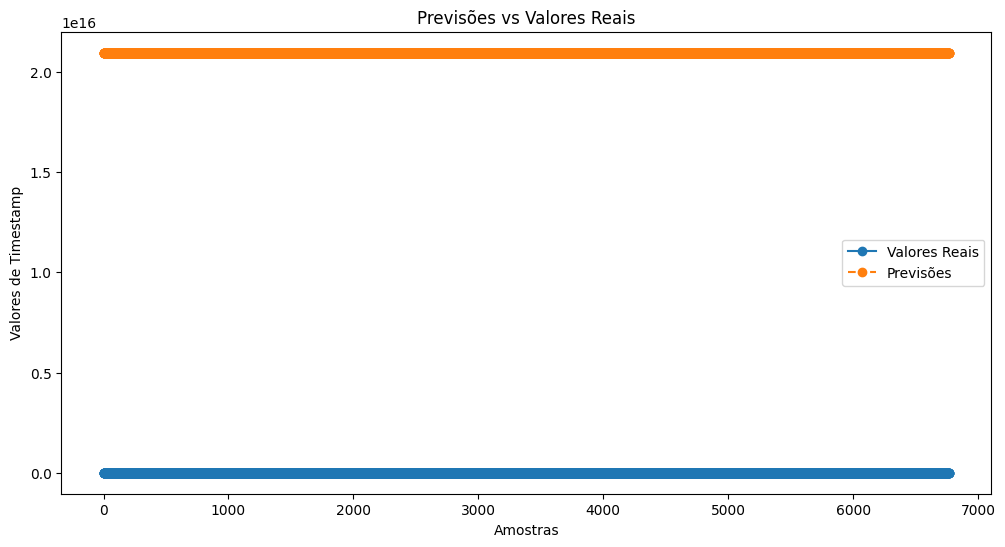

In [ ]:
# Desnormalize os dados de teste
y_test3 = scaler3.inverse_transform(y_test3.reshape(-1,1))

# Desnormalize as previsões
y_pred3 = scaler3.inverse_transform(y_pred3.reshape(-1,1))

# Crie um gráfico para visualizar as previsões
plt.figure(figsize=(12, 6))
plt.plot(y_test3, label='Valores Reais', marker='o', linestyle='-')
plt.plot(y_pred3, label='Previsões', marker='o', linestyle='--')
plt.xlabel('Amostras')
plt.ylabel('Valores de Timestamp')
plt.legend()
plt.title('Previsões vs Valores Reais')
plt.show()

In [ ]:
new_data = data.tail(150).reset_index(drop=True)
new_data['horario'] = pd.to_datetime(new_data['horario'])

new_data['timestamp'] = new_data['horario'].values.astype(np.int64) // 10**9

new_data['timestamp'] = scaler3.transform(new_data['timestamp'].values.reshape(-1,1))

X_new = new_data['timestamp'].values.reshape(-1,1,1)

y_pred_new = model3.predict(X_new)

y_pred_new = scaler3.inverse_transform(y_pred_new)

for i in range(len(y_pred_new)):
  timestamp = int(y_pred_new[i][0])
  predict_time = pd.to_datetime(timestamp, unit='s')
  print(f'Previsão {i + 1}: {predict_time}')

5/5 [==============================] - 0s 4ms/step
Previsão 1: 2023-10-14 13:05:04
Previsão 2: 2023-10-14 13:05:04
Previsão 3: 2023-10-14 13:05:04
Previsão 4: 2023-10-14 13:05:04
Previsão 5: 2023-10-14 13:05:04
Previsão 6: 2023-10-14 13:07:12
Previsão 7: 2023-10-14 13:07:12
Previsão 8: 2023-10-14 13:07:12
Previsão 9: 2023-10-14 13:07:12
Previsão 10: 2023-10-14 13:07:12
Previsão 11: 2023-10-14 13:07:12
Previsão 12: 2023-10-14 13:07:12
Previsão 13: 2023-10-14 13:07:12
Previsão 14: 2023-10-14 13:11:28
Previsão 15: 2023-10-14 13:11:28
Previsão 16: 2023-10-14 13:11:28
Previsão 17: 2023-10-14 13:11:28
Previsão 18: 2023-10-14 13:11:28
Previsão 19: 2023-10-14 13:11:28
Previsão 20: 2023-10-14 13:11:28
Previsão 21: 2023-10-14 13:11:28
Previsão 22: 2023-10-14 13:11:28
Previsão 23: 2023-10-14 13:11:28
Previsão 24: 2023-10-14 13:13:36
Previsão 25: 2023-10-14 13:13:36
Previsão 26: 2023-10-14 13:13:36
Previsão 27: 2023-10-14 13:13:36
Previsão 28: 2023-10-14 13:13:36
Previsão 29: 2023-10-14 13:13:36
P

In [ ]:
data6 = data

In [ ]:
data = data6

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense
from sklearn.preprocessing import MinMaxScaler

data['horario'] = pd.to_datetime(data['horario'])  # Converta a coluna de horário para datetime
data['timestamp'] = data['horario'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX

# Separe as características e alvo
X3 = data['timestamp'].values
y3 = data['timestamp'].shift(-1).fillna(0).values

# Divida os dados em treinamento e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train3 = X_train3.reshape(-1, 1, 1)
X_test3 = X_test3.reshape(-1, 1, 1)
# Além disso, normalize os dados como antes.
scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

# Defina o modelo Seq2Seq
model = keras.models.Sequential([
    Input(shape=(data_train_scaled.shape[1], data_train_scaled.shape[2])),
    LSTM(64, activation='relu', return_sequences=True),
    Dense(data_train_scaled.shape[1])
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Treine o modelo com seus dados de treinamento
model.fit(data_train_scaled, data_train_scaled, epochs=50, batch_size=1)

# Faça previsões com seus dados de teste
predictions = model.predict(data_test_scaled)

# Desnormalize as previsões
predictions_descaled = scaler.inverse_transform(predictions)


Dados Originais:
             timestamp
0  2023-10-16 00:00:00
1  2023-10-16 00:01:00
2  2023-10-16 00:02:00
3  2023-10-16 00:03:00
4  2023-10-16 00:04:00
..                 ...
95 2023-10-16 01:35:00
96 2023-10-16 01:36:00
97 2023-10-16 01:37:00
98 2023-10-16 01:38:00
99 2023-10-16 01:39:00

[100 rows x 1 columns]

Dados com Granularidade Reduzida:
Empty DataFrame
Columns: []
Index: [2023-10-16 00:00:00, 2023-10-16 00:30:00, 2023-10-16 01:00:00, 2023-10-16 01:30:00]


NameError: ignored

In [ ]:
data

,entrada,saida,timestamp1,timestamp2
0,2023-05-27 00:28:06,2023-05-27 00:28:18,1685147286,1685147298
1,2023-05-27 00:28:18,2023-05-27 00:28:42,1685147298,1685147322
2,2023-05-27 00:28:42,2023-05-27 00:28:56,1685147322,1685147336
3,2023-05-27 00:28:56,2023-05-27 00:29:26,1685147336,1685147366
4,2023-05-27 00:29:26,2023-05-27 00:29:50,1685147366,1685147390
...,...,...,...,...
34191,2023-10-17 00:34:40,2023-10-17 00:34:59,1697502880,1697502899
34192,2023-10-17 00:34:59,2023-10-17 00:35:12,1697502899,1697502912
34193,2023-10-17 00:35:12,2023-10-17 00:35:34,1697502912,1697502934
34194,2023-10-17 00:35:34,2023-10-17 00:35:52,1697502934,1697502952


In [ ]:
# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()
new_data['entrada'] = data['horario']
new_data['saida'] = data['horario'].shift(-1)

new_data = new_data.drop(new_data.index[-1])
# Visualize o DataFrame new_data
print(new_data)

                        entrada                     saida
0      Sat May 27 00:28:06 2023  Sat May 27 00:28:18 2023
1      Sat May 27 00:28:18 2023  Sat May 27 00:28:42 2023
2      Sat May 27 00:28:42 2023  Sat May 27 00:28:56 2023
3      Sat May 27 00:28:56 2023  Sat May 27 00:29:26 2023
4      Sat May 27 00:29:26 2023  Sat May 27 00:29:50 2023
...                         ...                       ...
34191  Tue Oct 17 00:34:40 2023  Tue Oct 17 00:34:59 2023
34192  Tue Oct 17 00:34:59 2023  Tue Oct 17 00:35:12 2023
34193  Tue Oct 17 00:35:12 2023  Tue Oct 17 00:35:34 2023
34194  Tue Oct 17 00:35:34 2023  Tue Oct 17 00:35:52 2023
34195  Tue Oct 17 00:35:52 2023  Tue Oct 17 00:36:23 2023

[34196 rows x 2 columns]


In [ ]:
data6 = data
data = new_data

In [ ]:
data

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,entrada,timestamp1
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12,2023-05-27 00:28:06,1685147286
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12,2023-05-27 00:28:18,1685147298
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12,2023-05-27 00:28:42,1685147322
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24,2023-05-27 00:28:56,1685147336
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14,2023-05-27 00:29:26,1685147366
...,...,...,...,...,...,...,...,...
34552,5.95,15,35,26,Tue Oct 17 15:35:26 2023,74,2023-10-17 15:35:26,1697556926
34553,2.09,15,35,51,Tue Oct 17 15:35:51 2023,33,2023-10-17 15:35:51,1697556951
34554,1.02,15,36,5,Tue Oct 17 15:36:05 2023,25,2023-10-17 15:36:05,1697556965
34555,2.01,15,36,27,Tue Oct 17 15:36:27 2023,14,2023-10-17 15:36:27,1697556987


In [ ]:
data['entrada'] = pd.to_datetime(data['entrada'])  # Converta a coluna de horário para datetime
data['timestamp1'] = data['entrada'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX
data['saida'] = pd.to_datetime(data['saida'])
data['timestamp2'] = data['saida'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX

# Normalize os dados
scaler3 = MinMaxScaler()
data['timestamp1'] = scaler3.fit_transform(data['timestamp1'].values.reshape(-1, 1))
data['timestamp2'] = scaler3.fit_transform(data['timestamp2'].values.reshape(-1, 1))

# Separe as características e alvo
X3 = data['timestamp1'].values
y3 = data['timestamp2'].values

# Divida os dados em treinamento e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train3 = X_train3.reshape(-1, 1, 1)
X_test3 = X_test3.reshape(-1, 1, 1)

# Crie o modelo LSTM
model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(1, 1), kernel_regularizer=l2(0.001)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1))

# Compile o modelo
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo
model3.fit(X_train3, y_train3, epochs=12, batch_size=1)

# Avalie o modelo
loss = model3.evaluate(X_test3, y_test3)
print(f"Erro Médio Quadrático no conjunto de teste: {loss}")

# Faça previsões
y_pred3 = model3.predict(X_test3)

# Desnormalize as previsões
y_pred3 = scaler3.inverse_transform(y_pred3)

Epoch 1/12
27356/27356 [==============================] - 66s 2ms/step - loss: 5.3427e-04 - mean_squared_error: 4.0052e-04
Epoch 2/12
27356/27356 [==============================] - 68s 2ms/step - loss: 1.1112e-04 - mean_squared_error: 7.1913e-05
Epoch 3/12
27356/27356 [==============================] - 67s 2ms/step - loss: 8.8959e-05 - mean_squared_error: 5.8311e-05
Epoch 4/12
27356/27356 [==============================] - 65s 2ms/step - loss: 7.5785e-05 - mean_squared_error: 5.0397e-05
Epoch 5/12
27356/27356 [==============================] - 65s 2ms/step - loss: 6.5097e-05 - mean_squared_error: 4.2928e-05
Epoch 6/12
27356/27356 [==============================] - 67s 2ms/step - loss: 6.8615e-05 - mean_squared_error: 4.8722e-05
Epoch 7/12
27356/27356 [==============================] - 63s 2ms/step - loss: 6.1861e-05 - mean_squared_error: 4.1146e-05
Epoch 8/12
27356/27356 [==============================] - 67s 2ms/step - loss: 5.5747e-05 - mean_squared_error: 3.8693e-05
Epoch 9/12
27356

In [ ]:
data

,entrada,saida,timestamp1,timestamp2
0,2023-05-27 00:28:06,2023-05-27 00:28:18,0.000000e+00,0.000000
1,2023-05-27 00:28:18,2023-05-27 00:28:42,9.712143e-07,0.000002
2,2023-05-27 00:28:42,2023-05-27 00:28:56,2.913643e-06,0.000003
3,2023-05-27 00:28:56,2023-05-27 00:29:26,4.046726e-06,0.000006
4,2023-05-27 00:29:26,2023-05-27 00:29:50,6.474762e-06,0.000007
...,...,...,...,...
34191,2023-10-17 00:34:40,2023-10-17 00:34:59,9.999942e-01,0.999993
34192,2023-10-17 00:34:59,2023-10-17 00:35:12,9.999957e-01,0.999994
34193,2023-10-17 00:35:12,2023-10-17 00:35:34,9.999968e-01,0.999996
34194,2023-10-17 00:35:34,2023-10-17 00:35:52,9.999985e-01,0.999997


In [ ]:
new_data = data.tail(150).reset_index(drop=True)

X_new = new_data['timestamp1'].values.reshape(-1,1,1)

y_pred_new = model3.predict(X_new)

y_pred_new = scaler3.inverse_transform(y_pred_new)

for i in range(len(y_pred_new)):
  timestamp = int(y_pred_new[i][0])
  predict_time = pd.to_datetime(timestamp, unit='s')
  print(f'Previsão {i + 1}: {predict_time}')

5/5 [==============================] - 0s 7ms/step
Previsão 1: 2023-10-12 15:08:48
Previsão 2: 2023-10-12 15:08:48
Previsão 3: 2023-10-12 15:08:48
Previsão 4: 2023-10-12 15:13:04
Previsão 5: 2023-10-12 15:13:04
Previsão 6: 2023-10-12 15:13:04
Previsão 7: 2023-10-12 15:13:04
Previsão 8: 2023-10-12 15:13:04
Previsão 9: 2023-10-12 15:13:04
Previsão 10: 2023-10-12 15:13:04
Previsão 11: 2023-10-12 15:13:04
Previsão 12: 2023-10-12 15:13:04
Previsão 13: 2023-10-12 15:13:04
Previsão 14: 2023-10-12 15:13:04
Previsão 15: 2023-10-12 15:13:04
Previsão 16: 2023-10-12 15:15:12
Previsão 17: 2023-10-12 15:15:12
Previsão 18: 2023-10-12 15:15:12
Previsão 19: 2023-10-12 15:15:12
Previsão 20: 2023-10-12 15:15:12
Previsão 21: 2023-10-12 15:15:12
Previsão 22: 2023-10-12 15:15:12
Previsão 23: 2023-10-12 15:15:12
Previsão 24: 2023-10-12 15:15:12
Previsão 25: 2023-10-12 15:15:12
Previsão 26: 2023-10-12 15:15:12
Previsão 27: 2023-10-12 15:19:28
Previsão 28: 2023-10-12 15:19:28
Previsão 29: 2023-10-12 15:19:28
P

In [ ]:
# Crie uma instância do StandardScaler
scaler3 = StandardScaler()

# Ajuste o scaler aos dados de entrada
X3 = data['timestamp1'].values.reshape(-1, 1)  # Redimensione os dados antes de ajustar
X3 = scaler3.fit_transform(X3)

y3 = data['timestamp2'].values.reshape(-1, 1)  # Redimensione os dados antes de ajustar
y3 = scaler3.fit_transform(y3)

# Divida os dados em treinamento e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train3 = X_train3.reshape(-1, 1, 1)
X_test3 = X_test3.reshape(-1, 1, 1)

# Crie o modelo LSTM
model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(1, 1), kernel_regularizer=l2(0.001)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1))

# Compile o modelo
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo
model3.fit(X_train3, y_train3, epochs=12, batch_size=1)

# Avalie o modelo
loss = model3.evaluate(X_test3, y_test3)
print(f"Erro Médio Quadrático no conjunto de teste: {loss}")

# Faça previsões
y_pred3 = model3.predict(X_test3)

# Desnormalize as previsões
y_pred3 = scaler3.inverse_transform(y_pred3)

Epoch 1/12
27356/27356 [==============================] - 115s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0026
Epoch 2/12
27356/27356 [==============================] - 70s 3ms/step - loss: 5.2733e-04 - mean_squared_error: 3.8425e-04
Epoch 3/12
27356/27356 [==============================] - 68s 2ms/step - loss: 4.5669e-04 - mean_squared_error: 3.3398e-04
Epoch 4/12
27356/27356 [==============================] - 69s 3ms/step - loss: 3.8571e-04 - mean_squared_error: 2.8238e-04
Epoch 5/12
27356/27356 [==============================] - 68s 2ms/step - loss: 3.2823e-04 - mean_squared_error: 2.4027e-04
Epoch 6/12
27356/27356 [==============================] - 69s 3ms/step - loss: 3.0467e-04 - mean_squared_error: 2.2527e-04
Epoch 7/12
27356/27356 [==============================] - 70s 3ms/step - loss: 3.4514e-04 - mean_squared_error: 2.6721e-04
Epoch 8/12
27356/27356 [==============================] - 66s 2ms/step - loss: 2.7359e-04 - mean_squared_error: 2.0692e-04
Epoch 9/12
27356/27356 

In [ ]:
new_data = data.tail(150).reset_index(drop=True)

X_new = new_data['timestamp1'].values.reshape(-1,1)
X_new = scaler3.fit_transform(X_new)
X_new = X_new.reshape(-1,1,1)

y_pred_new = model3.predict(X_new)

y_pred_new = scaler3.inverse_transform(y_pred_new)

5/5 [==============================] - 0s 4ms/step


In [ ]:
y_pred_new

array([[0.9997452 ],
       [0.9997453 ],
       [0.9997454 ],
       [0.9997455 ],
       [0.9997457 ],
       [0.99974585],
       [0.9997459 ],
       [0.999746  ],
       [0.9997461 ],
       [0.99974626],
       [0.99974644],
       [0.99974656],
       [0.9997467 ],
       [0.99974686],
       [0.99974704],
       [0.9997472 ],
       [0.99974734],
       [0.9997474 ],
       [0.99974746],
       [0.9997478 ],
       [0.999748  ],
       [0.99974823],
       [0.9997484 ],
       [0.9997486 ],
       [0.99974877],
       [0.9997492 ],
       [0.99975157],
       [0.9997546 ],
       [0.9997562 ],
       [0.99975824],
       [0.9997597 ],
       [0.99976087],
       [0.999765  ],
       [0.9997683 ],
       [0.99977076],
       [0.99977195],
       [0.9997769 ],
       [0.9997787 ],
       [0.99978065],
       [0.9997825 ],
       [0.9997836 ],
       [0.99978477],
       [0.9997888 ],
       [0.9997904 ],
       [0.9997938 ],
       [0.99979675],
       [0.99979883],
       [0.999

In [ ]:
for i in range(len(y_pred_new)):
  timestamp = int(y_pred_new[i][0])
  predict_time = pd.to_datetime(timestamp, unit='ns')
  print(f'Previsão {i + 1}: {predict_time}')

Previsão 1: 1970-01-01 00:00:00
Previsão 2: 1970-01-01 00:00:00
Previsão 3: 1970-01-01 00:00:00
Previsão 4: 1970-01-01 00:00:00
Previsão 5: 1970-01-01 00:00:00
Previsão 6: 1970-01-01 00:00:00
Previsão 7: 1970-01-01 00:00:00
Previsão 8: 1970-01-01 00:00:00
Previsão 9: 1970-01-01 00:00:00
Previsão 10: 1970-01-01 00:00:00
Previsão 11: 1970-01-01 00:00:00
Previsão 12: 1970-01-01 00:00:00
Previsão 13: 1970-01-01 00:00:00
Previsão 14: 1970-01-01 00:00:00
Previsão 15: 1970-01-01 00:00:00
Previsão 16: 1970-01-01 00:00:00
Previsão 17: 1970-01-01 00:00:00
Previsão 18: 1970-01-01 00:00:00
Previsão 19: 1970-01-01 00:00:00
Previsão 20: 1970-01-01 00:00:00
Previsão 21: 1970-01-01 00:00:00
Previsão 22: 1970-01-01 00:00:00
Previsão 23: 1970-01-01 00:00:00
Previsão 24: 1970-01-01 00:00:00
Previsão 25: 1970-01-01 00:00:00
Previsão 26: 1970-01-01 00:00:00
Previsão 27: 1970-01-01 00:00:00
Previsão 28: 1970-01-01 00:00:00
Previsão 29: 1970-01-01 00:00:00
Previsão 30: 1970-01-01 00:00:00
Previsão 31: 1970-0

In [ ]:
data['entrada']

0       2023-05-27 00:28:06
1       2023-05-27 00:28:18
2       2023-05-27 00:28:42
3       2023-05-27 00:28:56
4       2023-05-27 00:29:26
                ...        
34191   2023-10-17 00:34:40
34192   2023-10-17 00:34:59
34193   2023-10-17 00:35:12
34194   2023-10-17 00:35:34
34195   2023-10-17 00:35:52
Name: entrada, Length: 34196, dtype: datetime64[ns]

In [ ]:
data['timestamp1']

0        0.000000e+00
1        9.712143e-07
2        2.913643e-06
3        4.046726e-06
4        6.474762e-06
             ...     
34191    9.999942e-01
34192    9.999957e-01
34193    9.999968e-01
34194    9.999985e-01
34195    1.000000e+00
Name: timestamp1, Length: 34196, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense, Reshape
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Suponha que você carregou seus dados e fez a conversão para timestamps UNIX
# Certifique-se de que seus dados sejam uma série temporal ou sequência de eventos com timestamps
data['entrada'] = pd.to_datetime(data['entrada'])  # Converta a coluna de horário para datetime
data['timestamp1'] = data['entrada'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX
data['saida'] = pd.to_datetime(data['saida'])
data['timestamp2'] = data['saida'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX
# Redimensione os dados para a forma (amostras, passos de tempo, características)
X3 = data['timestamp1'].values
X3 = X3.reshape(-1, 1)  # Redimensione os dados para o formato correto

# Normalização dos dados
scaler3 = MinMaxScaler()
X3 = scaler3.fit_transform(X3)

y3 = data['timestamp2'].values.reshape(-1, 1,1)

# Divida os dados em treinamento e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Defina o modelo Seq2Seq
model3 = keras.models.Sequential([
    Input(shape=(X_train3.shape[1],)),  # Apenas uma dimensão para a entrada (passos de tempo)
    Reshape((X_train3.shape[1], 1)),  # Adicione uma camada de redimensionamento
    LSTM(64, activation='relu', return_sequences=True),
    Dense(y_train3.shape[1])  # O número de unidades deve corresponder à dimensão de saída
])


model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo com seus dados de treinamento
model3.fit(X_train3, y_train3, epochs=50, batch_size=1)

# Faça previsões com seus dados de teste
predictions3 = model3.predict(X_test3)

# Desnormalize as previsões, se necessário
predictions_descaled3 = scaler.inverse_transform(predictions3)


Epoch 1/50
27356/27356 [==============================] - 64s 2ms/step - loss: 2850474274282536960.0000 - mean_squared_error: 2850474274282536960.0000
Epoch 2/50
27356/27356 [==============================] - 63s 2ms/step - loss: 2850372294579060736.0000 - mean_squared_error: 2850372294579060736.0000
Epoch 3/50
27356/27356 [==============================] - 60s 2ms/step - loss: 2849923144079114240.0000 - mean_squared_error: 2849923144079114240.0000
Epoch 4/50
27356/27356 [==============================] - 62s 2ms/step - loss: 2849581470840782848.0000 - mean_squared_error: 2849581470840782848.0000
Epoch 5/50
27356/27356 [==============================] - 61s 2ms/step - loss: 2849261787835006976.0000 - mean_squared_error: 2849261787835006976.0000
Epoch 6/50
27356/27356 [==============================] - 62s 2ms/step - loss: 2848672999358332928.0000 - mean_squared_error: 2848672999358332928.0000
Epoch 7/50
27356/27356 [==============================] - 61s 2ms/step - loss: 284776562738751

KeyboardInterrupt: ignored

In [92]:
data6 = data

In [111]:
data

,entrada,saida,timestamp1,timestamp2,hora_seno,hora_cosseno,minuto_seno,minuto_cosseno,segundo_seno,segundo_cosseno
0,2023-05-27 00:28:06,2023-05-27 00:28:18,1685147286,1685147298,0.187483,1.297507,0.298496,-1.380906,0.811239,1.160722
1,2023-05-27 00:28:18,2023-05-27 00:28:42,1685147298,1685147322,0.187483,1.297507,0.298496,-1.380906,1.320381,-0.435083
2,2023-05-27 00:28:42,2023-05-27 00:28:56,1685147322,1685147336,0.187483,1.297507,0.298496,-1.380906,-1.345520,-0.435083
3,2023-05-27 00:28:56,2023-05-27 00:29:26,1685147336,1685147366,0.187483,1.297507,0.298496,-1.380906,-0.582630,1.309919
4,2023-05-27 00:29:26,2023-05-27 00:29:50,1685147366,1685147390,0.187483,1.297507,0.152231,-1.404053,0.557491,-1.297945
...,...,...,...,...,...,...,...,...,...,...
35399,2023-10-17 21:51:17,2023-10-17 21:51:38,1697579477,1697579498,-0.851442,0.889716,-1.140245,0.832717,1.358351,-0.290772
35400,2023-10-17 21:51:38,2023-10-17 21:52:12,1697579498,1697579532,-0.851442,0.889716,-1.140245,0.832717,-1.054122,-0.949084
35401,2023-10-17 21:52:12,2023-10-17 21:52:56,1697579532,1697579576,-0.851442,0.889716,-1.047049,0.947708,1.320381,0.447056
35402,2023-10-17 21:52:56,2023-10-17 21:53:15,1697579576,1697579595,-0.851442,0.889716,-1.047049,0.947708,-0.582630,1.309919


In [93]:
# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()
new_data['entrada'] = data['horario']
new_data['saida'] = data['horario'].shift(-1)

new_data = new_data.drop(new_data.index[-1])
# Visualize o DataFrame new_data
print(new_data)

                        entrada                     saida
0      Sat May 27 00:28:06 2023  Sat May 27 00:28:18 2023
1      Sat May 27 00:28:18 2023  Sat May 27 00:28:42 2023
2      Sat May 27 00:28:42 2023  Sat May 27 00:28:56 2023
3      Sat May 27 00:28:56 2023  Sat May 27 00:29:26 2023
4      Sat May 27 00:29:26 2023  Sat May 27 00:29:50 2023
...                         ...                       ...
35399  Tue Oct 17 21:51:17 2023  Tue Oct 17 21:51:38 2023
35400  Tue Oct 17 21:51:38 2023  Tue Oct 17 21:52:12 2023
35401  Tue Oct 17 21:52:12 2023  Tue Oct 17 21:52:56 2023
35402  Tue Oct 17 21:52:56 2023  Tue Oct 17 21:53:15 2023
35403  Tue Oct 17 21:53:15 2023  Tue Oct 17 21:53:56 2023

[35404 rows x 2 columns]


In [94]:
data = new_data

In [95]:
data['entrada'] = pd.to_datetime(data['entrada'])  # Converta a coluna de horário para datetime
data['timestamp1'] = data['entrada'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX
data['saida'] = pd.to_datetime(data['saida'])
data['timestamp2'] = data['saida'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX

In [96]:
data['timestamp1'].values.reshape(-1,1)

array([[1685147286],
       [1685147298],
       [1685147322],
       ...,
       [1697579532],
       [1697579576],
       [1697579595]])

In [97]:
data['timestamp2'].values.reshape(-1,1)

array([[1685147298],
       [1685147322],
       [1685147336],
       ...,
       [1697579576],
       [1697579595],
       [1697579636]])

In [98]:
import pandas as pd
import numpy as np
import datetime as dt

data['entrada'] = pd.to_datetime(data['entrada'])
# Criação de variáveis cíclicas para a hora, o minuto e o segundo do dia
data['hora_seno'] = np.sin(2 * np.pi * data['entrada'].dt.hour / 24)
data['hora_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.hour / 24)

data['minuto_seno'] = np.sin(2 * np.pi * data['entrada'].dt.minute / 60)
data['minuto_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.minute / 60)

data['segundo_seno'] = np.sin(2 * np.pi * data['entrada'].dt.second / 60)
data['segundo_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.second / 60)

# Normalização das características cíclicas
ciclicas = ['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno']
for feature in ciclicas:
    data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()


In [99]:
data

,entrada,saida,timestamp1,timestamp2,hora_seno,hora_cosseno,minuto_seno,minuto_cosseno,segundo_seno,segundo_cosseno
0,2023-05-27 00:28:06,2023-05-27 00:28:18,1685147286,1685147298,0.187483,1.297507,0.298496,-1.380906,0.811239,1.160722
1,2023-05-27 00:28:18,2023-05-27 00:28:42,1685147298,1685147322,0.187483,1.297507,0.298496,-1.380906,1.320381,-0.435083
2,2023-05-27 00:28:42,2023-05-27 00:28:56,1685147322,1685147336,0.187483,1.297507,0.298496,-1.380906,-1.345520,-0.435083
3,2023-05-27 00:28:56,2023-05-27 00:29:26,1685147336,1685147366,0.187483,1.297507,0.298496,-1.380906,-0.582630,1.309919
4,2023-05-27 00:29:26,2023-05-27 00:29:50,1685147366,1685147390,0.187483,1.297507,0.152231,-1.404053,0.557491,-1.297945
...,...,...,...,...,...,...,...,...,...,...
35399,2023-10-17 21:51:17,2023-10-17 21:51:38,1697579477,1697579498,-0.851442,0.889716,-1.140245,0.832717,1.358351,-0.290772
35400,2023-10-17 21:51:38,2023-10-17 21:52:12,1697579498,1697579532,-0.851442,0.889716,-1.140245,0.832717,-1.054122,-0.949084
35401,2023-10-17 21:52:12,2023-10-17 21:52:56,1697579532,1697579576,-0.851442,0.889716,-1.047049,0.947708,1.320381,0.447056
35402,2023-10-17 21:52:56,2023-10-17 21:53:15,1697579576,1697579595,-0.851442,0.889716,-1.047049,0.947708,-0.582630,1.309919


In [100]:
correlation_matrix = data[['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno', 'saida']].corr()
print(correlation_matrix)

                 hora_seno  hora_cosseno  minuto_seno  minuto_cosseno  \
hora_seno         1.000000      0.128077     0.015221       -0.010930   
hora_cosseno      0.128077      1.000000     0.004638        0.007312   
minuto_seno       0.015221      0.004638     1.000000        0.000587   
minuto_cosseno   -0.010930      0.007312     0.000587        1.000000   
segundo_seno      0.003300      0.003918    -0.001722       -0.001349   
segundo_cosseno   0.000069      0.000743     0.004023       -0.001966   

                 segundo_seno  segundo_cosseno  
hora_seno            0.003300         0.000069  
hora_cosseno         0.003918         0.000743  
minuto_seno         -0.001722         0.004023  
minuto_cosseno      -0.001349        -0.001966  
segundo_seno         1.000000         0.011250  
segundo_cosseno      0.011250         1.000000  


<ipython-input-100-6c0a1330ec22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno', 'saida']].corr()


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2

# Carregar seus dados
# Certifique-se de que suas variáveis cíclicas e outras features relevantes estão no DataFrame

# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados de entrada
X = data[['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno', 'timestamp1']]
X = scaler.fit_transform(X)

y = data['timestamp2'].values.reshape(-1, 1)  # Redimensione os dados antes de ajustar
y = scaler.fit_transform(y)

# Divida os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train = X_train.reshape(-1, 1, X.shape[1])
X_test = X_test.reshape(-1, 1, X.shape[1])

# Crie o modelo LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X.shape[1]), kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo
model.fit(X_train, y_train, epochs=12, batch_size=1)

# Avalie o modelo
loss = model.evaluate(X_test, y_test)
print(f"Erro Médio Quadrático no conjunto de teste: {loss}")

# Faça previsões
y_pred = model.predict(X_test)

# Desnormalize as previsões
y_pred = scaler.inverse_transform(y_pred)


Epoch 1/12
28323/28323 [==============================] - 91s 3ms/step - loss: 0.0059 - mean_squared_error: 0.0044
Epoch 2/12
28323/28323 [==============================] - 138s 5ms/step - loss: 0.0014 - mean_squared_error: 8.8381e-04
Epoch 3/12
28323/28323 [==============================] - 120s 4ms/step - loss: 9.6792e-04 - mean_squared_error: 6.3386e-04
Epoch 4/12
28323/28323 [==============================] - 114s 4ms/step - loss: 8.6136e-04 - mean_squared_error: 5.6598e-04
Epoch 5/12
28323/28323 [==============================] - 115s 4ms/step - loss: 7.5816e-04 - mean_squared_error: 5.1258e-04
Epoch 6/12
28323/28323 [==============================] - 104s 4ms/step - loss: 6.1528e-04 - mean_squared_error: 4.2534e-04
Epoch 7/12
28323/28323 [==============================] - 80s 3ms/step - loss: 5.8332e-04 - mean_squared_error: 4.0402e-04
Epoch 8/12
28323/28323 [==============================] - 70s 2ms/step - loss: 5.8781e-04 - mean_squared_error: 4.1278e-04
Epoch 9/12
28323/28323 

In [110]:
print(data.tail(1).reset_index(drop=True))
new_entry = data.tail(1).reset_index(drop=True)
# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_new = new_entry[['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno', 'timestamp1']].values
X_new = X_new.reshape(-1, 1, X_new.shape[1])

# Faça a previsão para o novo dado
y_pred_new = model.predict(X_new)

print(y_pred_new)

som = data['timestamp1'].tail(1).reset_index(drop=True).iloc[0]

# Desnormalize a previsão
predicted_timestamp = y_pred_new + som

print(predicted_timestamp)

predict_time = pd.to_datetime(predicted_timestamp[0, 0], unit='s')

#predict_time = pd.to_datetime(y_pred_new[0, 0], unit='s')
print(f'Previsão: {predict_time}')

              entrada               saida  timestamp1  timestamp2  hora_seno  \
0 2023-10-17 21:53:15 2023-10-17 21:53:56  1697579595  1697579636  -0.851442   

   hora_cosseno  minuto_seno  minuto_cosseno  segundo_seno  segundo_cosseno  
0      0.889716    -0.942335        1.052335      1.388978         0.005987  
1/1 [==============================] - 0s 27ms/step
[[1.8080221e+09]]
[[3.50560174e+09]]
Previsão: 2081-02-01 02:15:39


In [31]:
k = 0
ent = []
sai = []

while k <= 150:
  print(data.tail(1).reset_index(drop=True))
  data7 = data
  # Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
  new_data = pd.DataFrame()
  new_data['entrada'] = data['horario']
  new_data['saida'] = data['horario'].shift(-1)

  new_data = new_data.drop(new_data.index[-1])
  # Visualize o DataFrame new_data
  print(new_data)
  ent = new_data['entrada']
  data = new_data

  data['entrada'] = pd.to_datetime(data['entrada'])  # Converta a coluna de horário para datetime
  data['timestamp1'] = data['entrada'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX
  data['saida'] = pd.to_datetime(data['saida'])
  data['timestamp2'] = data['saida'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX

  data['entrada'] = pd.to_datetime(data['entrada'])
  # Criação de variáveis cíclicas para a hora, o minuto e o segundo do dia
  data['hora_seno'] = np.sin(2 * np.pi * data['entrada'].dt.hour / 24)
  data['hora_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.hour / 24)

  data['minuto_seno'] = np.sin(2 * np.pi * data['entrada'].dt.minute / 60)
  data['minuto_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.minute / 60)

  data['segundo_seno'] = np.sin(2 * np.pi * data['entrada'].dt.second / 60)
  data['segundo_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.second / 60)

  # Normalização das características cíclicas
  ciclicas = ['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno']
  for feature in ciclicas:
      data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()

  new_entry = data.tail(1).reset_index(drop=True)
  # Redimensione os dados para a forma (amostras, passos de tempo, características)
  X_new = new_entry[['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno', 'timestamp1']].values
  X_new = X_new.reshape(-1, 1, X_new.shape[1])

  # Faça a previsão para o novo dado
  y_pred_new = model.predict(X_new)

  print(y_pred_new)

  som = data['timestamp1'].tail(1).reset_index(drop=True).iloc[0]

  # Desnormalize a previsão
  predicted_timestamp = 12*y_pred_new + som

  print(predicted_timestamp)

  predict_time = pd.to_datetime(predicted_timestamp[0, 0], unit='s')

  #predict_time = pd.to_datetime(y_pred_new[0, 0], unit='s')
  print(f'Previsão: {predict_time}')



Previsão 1: 1970-01-01 00:00:01


0   2023-10-17 23:01:42
Name: entrada, dtype: datetime64[ns]

              entrada               saida  timestamp1  timestamp2  hora_seno  \
0 2023-10-17 23:01:42 2023-10-17 23:02:06  1697583702  1697583726  -0.190626   

   hora_cosseno  minuto_seno  minuto_cosseno  segundo_seno  segundo_cosseno  
0      1.244896     0.152614        1.406662     -1.345404        -0.434996  
1/1 [==============================] - 0s 60ms/step
[[1.4676939]]
[[1.69758372e+09]]
Previsão: 2023-10-17 23:01:59.612327680


In [25]:
data['entrada']

0       2023-05-27 00:28:06
1       2023-05-27 00:28:18
2       2023-05-27 00:28:42
3       2023-05-27 00:28:56
4       2023-05-27 00:29:26
                ...        
35551   2023-10-17 23:00:05
35552   2023-10-17 23:00:27
35553   2023-10-17 23:00:43
35554   2023-10-17 23:01:01
35555   2023-10-17 23:01:42
Name: entrada, Length: 35556, dtype: datetime64[ns]

In [ ]:
# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()
new_data['entrada'] = data['horario']
new_data['saida'] = data['horario'].shift(-1)

new_data = new_data.drop(new_data.index[-1])
# Visualize o DataFrame new_data
print(new_data)

data = new_data

data['entrada'] = pd.to_datetime(data['entrada'])  # Converta a coluna de horário para datetime
data['timestamp1'] = data['entrada'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX
data['saida'] = pd.to_datetime(data['saida'])
data['timestamp2'] = data['saida'].values.astype(np.int64) // 10 ** 9  # Converta o horário para timestamps UNIX

import pandas as pd
import numpy as np
import datetime as dt

data['entrada'] = pd.to_datetime(data['entrada'])
# Criação de variáveis cíclicas para a hora, o minuto e o segundo do dia
data['hora_seno'] = np.sin(2 * np.pi * data['entrada'].dt.hour / 24)
data['hora_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.hour / 24)

data['minuto_seno'] = np.sin(2 * np.pi * data['entrada'].dt.minute / 60)
data['minuto_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.minute / 60)

data['segundo_seno'] = np.sin(2 * np.pi * data['entrada'].dt.second / 60)
data['segundo_cosseno'] = np.cos(2 * np.pi * data['entrada'].dt.second / 60)

# Normalização das características cíclicas
ciclicas = ['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno']
for feature in ciclicas:
    data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2

# Carregar seus dados
# Certifique-se de que suas variáveis cíclicas e outras features relevantes estão no DataFrame

# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados de entrada
X = data[['hora_seno', 'hora_cosseno', 'minuto_seno', 'minuto_cosseno', 'segundo_seno', 'segundo_cosseno', 'timestamp1']]
X = scaler.fit_transform(X)

y = data['timestamp2'].values.reshape(-1, 1)  # Redimensione os dados antes de ajustar
y = scaler.fit_transform(y)

# Divida os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train = X_train.reshape(-1, 1, X.shape[1])
X_test = X_test.reshape(-1, 1, X.shape[1])

# Crie o modelo LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X.shape[1]), kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo
model.fit(X_train, y_train, epochs=12, batch_size=1)

# Avalie o modelo
loss = model.evaluate(X_test, y_test)
print(f"Erro Médio Quadrático no conjunto de teste: {loss}")

# Faça previsões
y_pred = model.predict(X_test)

# Desnormalize as previsões
y_pred = scaler.inverse_transform(y_pred)

                        entrada                     saida
0      Sat May 27 00:28:06 2023  Sat May 27 00:28:18 2023
1      Sat May 27 00:28:18 2023  Sat May 27 00:28:42 2023
2      Sat May 27 00:28:42 2023  Sat May 27 00:28:56 2023
3      Sat May 27 00:28:56 2023  Sat May 27 00:29:26 2023
4      Sat May 27 00:29:26 2023  Sat May 27 00:29:50 2023
...                         ...                       ...
34551  Tue Oct 17 15:34:53 2023  Tue Oct 17 15:35:26 2023
34552  Tue Oct 17 15:35:26 2023  Tue Oct 17 15:35:51 2023
34553  Tue Oct 17 15:35:51 2023  Tue Oct 17 15:36:05 2023
34554  Tue Oct 17 15:36:05 2023  Tue Oct 17 15:36:27 2023
34555  Tue Oct 17 15:36:27 2023  Tue Oct 17 15:36:44 2023

[34556 rows x 2 columns]


In [ ]:
# Crie uma instância do StandardScaler
scaler3 = StandardScaler()

# Ajuste o scaler aos dados de entrada
X3 = data['timestamp1'].values.reshape(-1, 1)  # Redimensione os dados antes de ajustar
X3 = scaler3.fit_transform(X3)

y3 = data['timestamp2'].values.reshape(-1, 1)  # Redimensione os dados antes de ajustar
y3 = scaler3.fit_transform(y3)

# Divida os dados em treinamento e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train3 = X_train3.reshape(-1, 1, 1)
X_test3 = X_test3.reshape(-1, 1, 1)

# Crie o modelo LSTM
model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(1, 1), kernel_regularizer=l2(0.001)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1))

# Compile o modelo
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo
model3.fit(X_train3, y_train3, epochs=12, batch_size=1)

# Avalie o modelo
loss = model3.evaluate(X_test3, y_test3)
print(f"Erro Médio Quadrático no conjunto de teste: {loss}")

# Faça previsões
y_pred3 = model3.predict(X_test3)

# Desnormalize as previsões
y_pred3 = scaler3.inverse_transform(y_pred3)

Epoch 1/12
27644/27644 [==============================] - 80s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0024
Epoch 2/12
27644/27644 [==============================] - 66s 2ms/step - loss: 4.3487e-04 - mean_squared_error: 3.1207e-04
Epoch 3/12
27644/27644 [==============================] - 63s 2ms/step - loss: 3.3396e-04 - mean_squared_error: 2.4288e-04
Epoch 4/12
27644/27644 [==============================] - 64s 2ms/step - loss: 2.9548e-04 - mean_squared_error: 2.2260e-04
Epoch 5/12
27644/27644 [==============================] - 65s 2ms/step - loss: 2.9141e-04 - mean_squared_error: 2.2482e-04
Epoch 6/12
27644/27644 [==============================] - 65s 2ms/step - loss: 2.8470e-04 - mean_squared_error: 2.2356e-04
Epoch 7/12
27644/27644 [==============================] - 68s 2ms/step - loss: 2.7723e-04 - mean_squared_error: 2.1782e-04
Epoch 8/12
27644/27644 [==============================] - 64s 2ms/step - loss: 2.9488e-04 - mean_squared_error: 2.3826e-04
Epoch 9/12
27644/27644 [

In [ ]:
new_data = data.tail(150).reset_index(drop=True)

X_new = new_data['timestamp1'].values.reshape(-1,1)
X_new = scaler3.fit_transform(X_new)
X_new = X_new.reshape(-1,1,1)

y_pred_new = model3.predict(X_new)

y_pred_new = scaler3.inverse_transform(y_pred_new)

5/5 [==============================] - 0s 4ms/step


In [ ]:
for i in range(len(y_pred_new)):
  timestamp = int(y_pred_new[i][0])
  predict_time = pd.to_datetime(timestamp, unit='ns')
  print(f'Previsão {i + 1}: {predict_time}')

Previsão 1: 1970-01-01 00:00:01.697553792
Previsão 2: 1970-01-01 00:00:01.697553792
Previsão 3: 1970-01-01 00:00:01.697553792
Previsão 4: 1970-01-01 00:00:01.697553792
Previsão 5: 1970-01-01 00:00:01.697553792
Previsão 6: 1970-01-01 00:00:01.697553792
Previsão 7: 1970-01-01 00:00:01.697553792
Previsão 8: 1970-01-01 00:00:01.697553792
Previsão 9: 1970-01-01 00:00:01.697553792
Previsão 10: 1970-01-01 00:00:01.697553792
Previsão 11: 1970-01-01 00:00:01.697553792
Previsão 12: 1970-01-01 00:00:01.697553792
Previsão 13: 1970-01-01 00:00:01.697553792
Previsão 14: 1970-01-01 00:00:01.697553792
Previsão 15: 1970-01-01 00:00:01.697553792
Previsão 16: 1970-01-01 00:00:01.697553792
Previsão 17: 1970-01-01 00:00:01.697553792
Previsão 18: 1970-01-01 00:00:01.697553792
Previsão 19: 1970-01-01 00:00:01.697553792
Previsão 20: 1970-01-01 00:00:01.697553792
Previsão 21: 1970-01-01 00:00:01.697553792
Previsão 22: 1970-01-01 00:00:01.697553792
Previsão 23: 1970-01-01 00:00:01.697553792
Previsão 24: 1970-01

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.model_selection import train_test_split

# Suponha que você carregou seus dados e fez a conversão para timestamps UNIX
# Certifique-se de que seus dados sejam uma série temporal ou sequência de eventos com timestamps

# Calcule a média e o desvio padrão para a unidade de período (por exemplo, um dia)
day_mean = data.groupby(data['horario'].dt.day)['timestamp1'].mean()
day_std = data.groupby(data['horario'].dt.day)['timestamp1'].std()

# Normalize os dados usando a média e o desvio padrão do dia correspondente
data['normalized_timestamp1'] = data.apply(lambda row: (row['timestamp1'] - day_mean[row['horario'].day]) / day_std[row['horario'].day], axis=1)

# Separe as características e alvo
X3 = data['normalized_timestamp1'].values
y3 = data['timestamp2'].shift(-1).fillna(0).values

# Divida os dados em treinamento e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Redimensione os dados para a forma (amostras, passos de tempo, características)
X_train3 = X_train3.reshape(-1, 1, 1)
X_test3 = X_test3.reshape(-1, 1, 1)

# Defina o modelo LSTM
model3 = keras.models.Sequential([
    Input(shape=(X_train3.shape[1], X_train3.shape[2])),
    LSTM(64, activation='relu', return_sequences=True),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mean_squared_error')

# Treine o modelo com seus dados de treinamento
model3.fit(X_train3, y_train3, epochs=50, batch_size=1)

# Faça previsões com seus dados de teste
predictions3 = model3.predict(X_test3)


AttributeError: ignored